# <a href="#C1"> Etude de Marché pour une Expansion à l'international

## Descriptif :
-  Une entreprise française d’agroalimentaire souhaite se développer à l'international.

## Objectifs : 
- Proposer une première analyse des groupements de pays que l’on peut cibler pour exporter nos poulets. Nous approfondirons ensuite l'étude de marché. 
#### 

- 1) [Import des librairies](#Import-des-librairies)
- 2) [Data scraping_FAO](#Data-scraping-FAO)
- 3) [Sélection de l'année 2019](#Sélection-de-l'année-2019)
- 4) [Bilan alimentaires](#Bilan-alimentaires)
- 5) [Indicateurs macro économiques](#Indicateurs-macro-économiques)
- 6) [Indicateurs ODD](#Indicateurs-ODD)
- 7) [Indicateurs emploi agriculture](#Indicateurs-emploi-agriculture)
- 8) [Prix à la Consommation](#Prix-à-la-Consommation)
- 9) [Sécurité alimentaire](#Sécurité-alimentaire)
- 10) [Sélection des pays](#Sélection-des-pays)
- 11) [Jointures](#Jointures)
- 12) [Valeurs manquantes - NaN](#Valeurs-manquantes---NaN)
        - [Revenu National Brut](#Revenu-National-Brut)
        - [Valeur importations alimentaires / exportations](#Valeur-importations-alimentaires-/-exportations)
        - [Production - Viande de volailles](#Production---Viande-de-volailles)
        - [Stabilité politique](#Stabilité-politique)
        - [PIB par habitant](#PIB-par-habitant)
        - [Utilisation services eau de base](#Utilisation-services-eau-de-base)
        - [Food price inflation](#Food-price-inflation)
        - [Agriculture value added per worker](#Agriculture-value-added-per-worker)
        - [Agriculture value added share of GDP](#Agriculture-value-added-share-of-GDP)
        - [Prevalence of Undernourishment](#Prevalence-of-Undernourishment)
        - [Accès eau potable](#Accès-eau-potable)
- 13) [Import des fichiers Population et Region](#Import-des-fichiers-Population-et-Region)
        - [Population - Sélection de l'année la plus récente](#Population---Sélection-de-l'année-la-plus-récente)
        - [Calcul de la distance des pays par rapport à la FRANCE](#Calcul-de-la-distance-des-pays-par-rapport-à-la-FRANCE)
- 14) [Création du dataset : data](#Création-du-dataset-:-data)
        - [Jointures - data](#Jointures---data)
        - [Analyse des pays candidats](#Analyse-des-pays-candidats)
- 15) [Analyse exploratoire](#Analyse-exploratoire)
        - [Types de données](#Types-de-données)
        - [Analyse des Outliers](#Analyse-des-Outliers)
            - [Python Outlier Detection / PyOD](#Python-Outlier-Detection-/-PyOD)
            - [Suppression des outliers](#Suppression-des-outliers)
        - [Correlation Heatmap](#Correlation-Heatmap)
- 16) [Export du fichier final en CSV](#Export-du-fichier-final-en-CSV)

# Import des librairies

In [1]:
import pandas as pd
import numpy as np
import requests
from io import BytesIO
from zipfile import ZipFile
from bs4 import BeautifulSoup
import seaborn as sns
import matplotlib.pyplot as plt
import warnings

# Data scraping FAO

In [2]:
warnings.filterwarnings("ignore")
# Associer chaque URL à son nom de fichier correspondant
url_NamesFiles = {
    "BilansAlimentaires": "https://fenixservices.fao.org/faostat/static/bulkdownloads/BilansAlimentaires_F_Toutes_les_Donn%C3%A9es_(Normalis%C3%A9).zip",
    "Indicateurs_Macro_ECONOMIQUES" : "https://fenixservices.fao.org/faostat/static/bulkdownloads/Statistiques-macro_Indicateurs_cl%C3%A9s_F_Toutes_les_Donn%C3%A9es_(Normalis%C3%A9).zip",
    "Indicateurs_objectifs_développement_durable" : "https://fenixservices.fao.org/faostat/static/bulkdownloads/SDG_BulkDownloads_F_Toutes_les_Donn%C3%A9es_(Normalis%C3%A9).zip",
    "Indicateurs_Emploi_Agriculture" : "https://fenixservices.fao.org/faostat/static/bulkdownloads/Indicateurs_de_l_emploi_agriculture_F_Toutes_les_Donn%C3%A9es_(Normalis%C3%A9).zip",
    "Indices_Prix_à_la_Consommation" : "https://fenixservices.fao.org/faostat/static/bulkdownloads/IndicesPrixConsommation_F_Toutes_les_Donn%C3%A9es_(Normalis%C3%A9).zip",                
    "Securite_alimentaire": "https://fenixservices.fao.org/faostat/static/bulkdownloads/Donn%C3%A9es_de_la_s%C3%A9curit%C3%A9_alimentaire_F_Toutes_les_Donn%C3%A9es_(Normalis%C3%A9).zip"
}

dfs = {}
for name, url in url_NamesFiles.items():
    zip_data = requests.get(url).content
    zip_file = ZipFile(BytesIO(zip_data))

    for csv_file in zip_file.namelist():
        if csv_file.endswith(".csv"):
            csv_data = zip_file.read(csv_file)
            try:
                df = pd.read_csv(BytesIO(csv_data), encoding='utf-8')
            except UnicodeDecodeError:
                df = pd.read_csv(BytesIO(csv_data), encoding='latin1')
            dfs[name] = df
            
# Renommer les DF
Bilan_Alimentaires = dfs["BilansAlimentaires"]
Indicateurs_Macro_ECO = dfs["Indicateurs_Macro_ECONOMIQUES"]
Indicateurs_ODD = dfs["Indicateurs_objectifs_développement_durable"]
Indicateurs_Emploi_Agriculture = dfs["Indicateurs_Emploi_Agriculture"]
Indices_Prix_à_la_Consommation = dfs["Indices_Prix_à_la_Consommation"]
Securite_alimentaire = dfs["Securite_alimentaire"]

# Renommer la colonne "Indicateur" pour matcher les autres DF
Indicateurs_Emploi_Agriculture.rename(columns={"Indicateur" : "Produit"}, inplace=True)
# Vérif
Indicateurs_Emploi_Agriculture.head()

,Code zone,Code zone (M49),Zone,Code source,Source,Code indicateur,Produit,Code sexe,Sexe,Code Élément,Élément,Code année,Année,Unité,Valeur,Symbole,Note
0,202,'710,Afrique du Sud,3043,ILO - ILO Modelled Estimates,21144,"Employment in agriculture, forestry and fishin...",1,Total,6199,Valeur,1991,1991,1000 No,2793.33,X,NaN
1,202,'710,Afrique du Sud,3043,ILO - ILO Modelled Estimates,21144,"Employment in agriculture, forestry and fishin...",1,Total,6199,Valeur,1992,1992,1000 No,2829.31,X,NaN
2,202,'710,Afrique du Sud,3043,ILO - ILO Modelled Estimates,21144,"Employment in agriculture, forestry and fishin...",1,Total,6199,Valeur,1993,1993,1000 No,2860.86,X,NaN
3,202,'710,Afrique du Sud,3043,ILO - ILO Modelled Estimates,21144,"Employment in agriculture, forestry and fishin...",1,Total,6199,Valeur,1994,1994,1000 No,2887.11,X,NaN
4,202,'710,Afrique du Sud,3043,ILO - ILO Modelled Estimates,21144,"Employment in agriculture, forestry and fishin...",1,Total,6199,Valeur,1995,1995,1000 No,2911.09,X,NaN


# Sélection de l'année 2019

In [3]:
Securite_alimentaire["Année"] = Securite_alimentaire["Année"].apply(lambda x : int(x.split("-")[0])+1)

In [4]:
Securite_alimentaire

,Code zone,Code zone (M49),Zone,Code Produit,Produit,Code Élément,Élément,Code année,Année,Unité,Valeur,Symbole,Note
0,150,'528,\tPays-Bas (Royaume des),21010,Suffisance des apports énergétiques alimentair...,6121,Valeur,20002002,2001,%,126,E,NaN
1,150,'528,\tPays-Bas (Royaume des),21010,Suffisance des apports énergétiques alimentair...,6121,Valeur,20012003,2002,%,125,E,NaN
2,150,'528,\tPays-Bas (Royaume des),21010,Suffisance des apports énergétiques alimentair...,6121,Valeur,20022004,2003,%,124,E,NaN
3,150,'528,\tPays-Bas (Royaume des),21010,Suffisance des apports énergétiques alimentair...,6121,Valeur,20032005,2004,%,124,E,NaN
4,150,'528,\tPays-Bas (Royaume des),21010,Suffisance des apports énergétiques alimentair...,6121,Valeur,20042006,2005,%,124,E,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
223808,9011,'906,Upper-middle-income economies,21061,Disponibilités moyennes de matière grasse (g/p...,6123,Valeur,20142016,2015,g/personne/jour,99.4,E,NaN
223809,9011,'906,Upper-middle-income economies,21061,Disponibilités moyennes de matière grasse (g/p...,6123,Valeur,20152017,2016,g/personne/jour,100.6,E,NaN
223810,9011,'906,Upper-middle-income economies,21061,Disponibilités moyennes de matière grasse (g/p...,6123,Valeur,20162018,2017,g/personne/jour,101.9,E,NaN
223811,9011,'906,Upper-middle-income economies,21061,Disponibilités moyennes de matière grasse (g/p...,6123,Valeur,20172019,2018,g/personne/jour,102.8,E,NaN


In [5]:
annee = 2019

# Sélection des années >= 2010
Bilan_Alimentaires = Bilan_Alimentaires[Bilan_Alimentaires["Année"] == annee]
Indicateurs_Macro_ECO = Indicateurs_Macro_ECO[Indicateurs_Macro_ECO["Année"] == annee]
Indicateurs_ODD = Indicateurs_ODD[Indicateurs_ODD["Année"] == annee]
Indicateurs_Emploi_Agriculture = Indicateurs_Emploi_Agriculture[Indicateurs_Emploi_Agriculture["Année"] == annee]
Indices_Prix_à_la_Consommation = Indices_Prix_à_la_Consommation[Indices_Prix_à_la_Consommation["Année"] == annee]

# Vous pouvez ensuite utiliser la méthode "replace" pour remplacer les valeurs dans la colonne "Année" du dataset.
Securite_alimentaire = Securite_alimentaire[Securite_alimentaire["Année"] == annee]

# Bilan alimentaires

In [6]:
# Variables de la colonne "Produit"
VIANDES_Produit = ["Viande de Volailles", "Viande poids vif, poulet, fraîche ou réfrigérée","Viande, poulet, fraîche ou réfrigérée"]

# Variables de la colonne "Element"
LISTE_ELEMENT_Bilan_Alimentaires = ["Aliments pour animaux","Disponibilité alimentaire (Kcal/personne/jour)",
                                   "Disponibilité alimentaire en quantité (kg/personne/an)",
                                   "Disponibilité de protéines en quantité (g/personne/jour)","Disponibilité intérieure",
                                   "Exportations - Quantité","Importations - Quantité","Nourriture","Production"]

# Selection des variables souhaitées
Bilan_Alimentaires = Bilan_Alimentaires[Bilan_Alimentaires["Produit"].isin(VIANDES_Produit) & 
                                        Bilan_Alimentaires["Élément"].isin(LISTE_ELEMENT_Bilan_Alimentaires)]

# Renommer les variables avec leurs unités.
Bilan_Alimentaires.replace({"Aliments pour animaux":"Aliments_pour_animaux_x1000T",
                                  "Disponibilité intérieure":"Disponibilite_interieure_x1000T",
                                  "Exportations - Quantité":"Exportations_Qte_x1000",
                                  "Importations - Quantité":"Importations_Qte_x1000T",
                                  "Nourriture":"Nourriture_x1000T",
                                  "Production":"Production_x1000T"},inplace=True)

# Pivoter la colonne "Element"
Bilan_Alimentaires = Bilan_Alimentaires.pivot(index=["Zone", "Produit", "Année"], columns="Élément", values="Valeur")
# Réinitialisation de l'index
Bilan_Alimentaires = Bilan_Alimentaires.reset_index()
# Vérification
display(Bilan_Alimentaires.head())

# Doublons ?
def check_doublons(df, colonnes):
    if df.duplicated(colonnes).sum() == 0:
        print("Les colonnes " + ", ".join(colonnes) + " ne contiennent pas de doublons.")
    else:
        print("Les colonnes " + ", ".join(colonnes) + " contiennent des doublons, la liste des doublons est : ")
        temp = df[df.duplicated(colonnes)]
        display(temp)

check_doublons(Bilan_Alimentaires, ["Zone", "Année"])

Élément,Zone,Produit,Année,Disponibilite_interieure_x1000T,Disponibilité alimentaire (Kcal/personne/jour),Disponibilité alimentaire en quantité (kg/personne/an),Disponibilité de protéines en quantité (g/personne/jour),Exportations_Qte_x1000,Importations_Qte_x1000T,Nourriture_x1000T,Production_x1000T
0,Afghanistan,Viande de Volailles,2019,69.0,6.29,1.80,0.64,NaN,44.0,69.0,28.0
1,Afrique,Viande de Volailles,2019,8482.0,23.44,6.57,2.33,104.0,1797.0,8456.0,6948.0
2,Afrique australe,Viande de Volailles,2019,2220.0,133.64,33.31,13.14,74.0,533.0,2220.0,1838.0
3,Afrique centrale,Viande de Volailles,2019,761.0,14.76,4.40,1.51,1.0,594.0,761.0,169.0
4,Afrique du Sud,Viande de Volailles,2019,2178.0,149.63,37.20,14.70,48.0,488.0,2178.0,1816.0


Les colonnes Zone, Année ne contiennent pas de doublons.


# Indicateurs macro économiques

In [7]:
Indicateurs_Macro_ECO.head()

,Code zone,Code zone (M49),Zone,Code Produit,Produit,Code Élément,Élément,Code année,Année,Unité,Valeur,Symbole,Note
49,150,'528,\tPays-Bas (Royaume des),22008,Produit Intérieur Brut,6109,Valeur en devise locale,2019,2019,million LCU,813055.000000,X,NaN
102,150,'528,\tPays-Bas (Royaume des),22008,Produit Intérieur Brut,6110,Valeur US $,2019,2019,Millions dUSD,910194.347600,X,NaN
155,150,'528,\tPays-Bas (Royaume des),22008,Produit Intérieur Brut,6119,Valeur US $ par habitant,2019,2019,US$,52420.699958,X,NaN
208,150,'528,\tPays-Bas (Royaume des),22008,Produit Intérieur Brut,6183,"Valeur en devise locale, aux prix de 2015",2019,2019,million LCU,757314.706000,X,NaN
261,150,'528,\tPays-Bas (Royaume des),22008,Produit Intérieur Brut,6185,"Valeur US $ par habitant, aux prix du 2015",2019,2019,US$,48372.971703,X,NaN


In [8]:
# Variables de la colonne "Produit"
Produit_Indicateurs_Macro_ECO = ["Revenu national brut"]
# Variables de la colonne "Element"
LISTE_ELEMENT_Indicateurs_Macro_ECO = ["Valeur US $ par habitant", "Croissance annuelle US$ par habitant"]
# Selection des variables souhaitées
Indicateurs_Macro_ECO = Indicateurs_Macro_ECO[Indicateurs_Macro_ECO["Produit"].isin(Produit_Indicateurs_Macro_ECO) & 
                                              Indicateurs_Macro_ECO["Élément"].isin(LISTE_ELEMENT_Indicateurs_Macro_ECO)]

# Renommer les variables avec leurs unités.
Indicateurs_Macro_ECO["Élément"].replace({"Valeur US $ par habitant":"Revenu_National_Brut_Valeur_USD/habitant", 
                                        "Croissance annuelle US$ par habitant" : "Revenu_National_Brut_Croissance_annuelle_USD/habitant_%"}, inplace=True)

# Pivoter la colonne "Element"
Indicateurs_Macro_ECO = Indicateurs_Macro_ECO.pivot(index=["Zone", "Année"], columns= "Élément", values= "Valeur")

# Réinitialisation de l'index
Indicateurs_Macro_ECO = Indicateurs_Macro_ECO.reset_index()
# Renommer les Pays-Bas
Indicateurs_Macro_ECO["Zone"].replace({"\tPays-Bas (Royaume des)":"Pays-Bas"}, inplace=True)
# Vérification
display(Indicateurs_Macro_ECO.head())

# Doublons ?
def check_doublons(df, colonnes):
    if df.duplicated(colonnes).sum() == 0:
        print("Les colonnes " + ", ".join(colonnes) + " ne contiennent pas de doublons.")
    else:
        print("Les colonnes " + ", ".join(colonnes) + " contiennent des doublons, la liste des doublons est : ")
        temp = df[df.duplicated(colonnes)]
        display(temp)

check_doublons(Indicateurs_Macro_ECO, ["Zone", "Année"])

Élément,Zone,Année,Revenu_National_Brut_Croissance_annuelle_USD/habitant_%,Revenu_National_Brut_Valeur_USD/habitant
0,Pays-Bas,2019,-2.513162,51354.368707
1,Afghanistan,2019,0.237607,508.479473
2,Afrique,2019,1.135500,1865.722562
3,Afrique australe,2019,-4.730658,6230.039604
4,Afrique centrale,2019,-11.905920,1195.190698


Les colonnes Zone, Année ne contiennent pas de doublons.


# Indicateurs ODD

In [9]:
# Variables de la colonne "Produit"
Produit_Indicateurs_ODD = [
"2.a.1 Agriculture share of Government Expenditure", 
"2.a.1 Agriculture value added share of GDP",
"2.1.2 Prevalence of severe food insecurity (both sexes or no breakdown by sex) (all age ranges or no breakdown by age)",
"2.1.1 Prevalence of undernourishment",
"Level of water stress (Agriculture (ISIC4 A01 A0210 A0322))",     
]
    
# Variables de la colonne "Element"
LISTE_ELEMENT_Indicateurs_ODD = ["Valeur"]
# Selection des variables souhaitées
Indicateurs_ODD = Indicateurs_ODD[Indicateurs_ODD["Produit"].isin(Produit_Indicateurs_ODD) & 
                                              Indicateurs_ODD["Élément"].isin(LISTE_ELEMENT_Indicateurs_ODD)]

# Création du dictionnaire pour renommer les variables
Produit_Indicateurs_ODD = {
"2.a.1 Agriculture share of Government Expenditure": "Agriculture_Expenditure_Share",
"2.a.1 Agriculture value added share of GDP": "Agriculture_Value_Added_Share_of_GDP",
"2.1.2 Prevalence of severe food insecurity (both sexes or no breakdown by sex) (all age ranges or no breakdown by age)": "Prevalence_Severe_Food_Insecurity",
"2.1.1 Prevalence of undernourishment": "Prevalence_of_Undernourishment",
"6.4.2 Level of water stress (Agriculture (ISIC4 A01 A0210 A0322))": "Stress_Water_level_Agriculture",
}

# Renommer les variables
Indicateurs_ODD["Produit"].replace(Produit_Indicateurs_ODD, inplace=True)

# Pivoter la colonne "Element"
Indicateurs_ODD = Indicateurs_ODD.pivot(index=["Zone", "Année"], columns= "Produit", values= "Valeur")

# Réinitialisation de l'index
Indicateurs_ODD = Indicateurs_ODD.reset_index()
# Renommer les Pays-Bas
Indicateurs_ODD["Zone"].replace({"\tPays-Bas (Royaume des)":"Pays-Bas"}, inplace=True)
# Vérification
display(Indicateurs_ODD.head())

# Doublons ?
def check_doublons(df, colonnes):
    if df.duplicated(colonnes).sum() == 0:
        print("Les colonnes " + ", ".join(colonnes) + " ne contiennent pas de doublons.")
    else:
        print("Les colonnes " + ", ".join(colonnes) + " contiennent des doublons, la liste des doublons est : ")
        temp = df[df.duplicated(colonnes)]
        display(temp)

check_doublons(Indicateurs_ODD, ["Zone", "Année"])

Produit,Zone,Année,Agriculture_Expenditure_Share,Agriculture_Value_Added_Share_of_GDP,Prevalence_of_Undernourishment
0,Pays-Bas,2019,0.3,1.64,<2.5
1,Afghanistan,2019,9.04,25.77,26.9
2,Afrique,2019,2.21,15.25,17
3,Afrique australe,2019,1.39,2.2,8.3
4,Afrique centrale,2019,1.37,13.56,24.8


Les colonnes Zone, Année ne contiennent pas de doublons.


# Indicateurs emploi agriculture

In [10]:
# Variables de la colonne "Produit"
Produit_Indicateurs_Emploi_Agriculture = [
"Agriculture value added per worker (constant 2015 US$)",
"Mean weekly hours actually worked per employee in agriculture, forestry and fishing"]
    
# Variables de la colonne "Element"
LISTE_ELEMENT_Indicateurs_Emploi_Agriculture = ["Valeur"]
# Selection des variables souhaitées
Indicateurs_Emploi_Agriculture = Indicateurs_Emploi_Agriculture[Indicateurs_Emploi_Agriculture["Produit"].isin(Produit_Indicateurs_Emploi_Agriculture) & 
                                              Indicateurs_Emploi_Agriculture["Élément"].isin(LISTE_ELEMENT_Indicateurs_Emploi_Agriculture)]

# # Création du dictionnaire pour renommer les variables
Produit_Indicateurs_Emploi_Agriculture = {
"Agriculture value added per worker (constant 2015 US$)":"Agriculture_Value_Added_per_worker",
"Mean weekly hours actually worked per employee in agriculture, forestry and fishing":"Mean_weekly_hours_worked_per_employee_in_agriculture"}

# Renommer les variables
Indicateurs_Emploi_Agriculture["Produit"].replace(Produit_Indicateurs_Emploi_Agriculture, inplace=True)
# Pivoter la colonne "Element"
Indicateurs_Emploi_Agriculture = Indicateurs_Emploi_Agriculture.pivot_table(index=["Zone", "Année"], columns= "Produit", values= "Valeur")
# Réinitialisation de l'index
Indicateurs_Emploi_Agriculture = Indicateurs_Emploi_Agriculture.reset_index()
# Vérification
display(Indicateurs_Emploi_Agriculture.head())

# Doublons ?
def check_doublons(df, colonnes):
    if df.duplicated(colonnes).sum() == 0:
        print("Les colonnes " + ", ".join(colonnes) + " ne contiennent pas de doublons.")
    else:
        print("Les colonnes " + ", ".join(colonnes) + " contiennent des doublons, la liste des doublons est : ")
        temp = df[df.duplicated(colonnes)]
        display(temp)

check_doublons(Indicateurs_Emploi_Agriculture, ["Zone", "Année"])

Produit,Zone,Année,Agriculture_Value_Added_per_worker,Mean_weekly_hours_worked_per_employee_in_agriculture
0,Afrique du Sud,2019,2170.45,44.263333
1,Albanie,2019,5072.44,42.943333
2,Algérie,2019,18967.37,NaN
3,Allemagne,2019,37338.75,34.233333
4,Angola,2019,1422.42,NaN


Les colonnes Zone, Année ne contiennent pas de doublons.


# Prix à la Consommation

In [11]:
# Renommer les variables
Indices_Prix_à_la_Consommation["Produit"].replace({"Food price inflation":"Food_price_inflation_%"}, inplace=True)
# Pivoter la colonne "Produit"
Indices_Prix_à_la_Consommation = Indices_Prix_à_la_Consommation.pivot_table(index=["Zone", "Année"], columns= "Produit", values= "Valeur")
# Réinitialisation de l'index
Indices_Prix_à_la_Consommation = Indices_Prix_à_la_Consommation.reset_index()
Indices_Prix_à_la_Consommation = Indices_Prix_à_la_Consommation[["Zone", "Année", "Food_price_inflation_%"]]
# Vérification
Indices_Prix_à_la_Consommation.head()

# Doublons ?
def check_doublons(df, colonnes):
    if df.duplicated(colonnes).sum() == 0:
        print("Les colonnes " + ", ".join(colonnes) + " ne contiennent pas de doublons.")
    else:
        print("Les colonnes " + ", ".join(colonnes) + " contiennent des doublons, la liste des doublons est : ")
        temp = df[df.duplicated(colonnes)]
        display(temp)

check_doublons(Indices_Prix_à_la_Consommation, ["Zone", "Année"])

Les colonnes Zone, Année ne contiennent pas de doublons.


# Sécurité alimentaire

In [12]:
# Variables de la colonne "Produit"
Produit_Securite_alimentaire = [
'PIB par habitant, ($ PPA internationaux constants de 2017)',
'Valeur des importations alimentaires par rapport aux exportations totales de marchandises (%) (moyenne sur 3 ans)',
'Stabilité politique et absence de violence/terrorisme (indice)',
"Pourcentage de la population ayant accès à des services d'eau potable gérés en toute sécurité",
"Pourcentage de la population utilisant au moins les services d'eau de base",
"Prévalence de l'excès pondéral chez l\x92enfant de moins de 5 ans (estimation modélisée) (%)"]
    
# Variables de la colonne "Element"
LISTE_ELEMENT_Securite_alimentaire = ["Valeur"]
# Selection des variables souhaitées
Securite_alimentaire = Securite_alimentaire[Securite_alimentaire["Produit"].isin(Produit_Securite_alimentaire) & 
                                              Securite_alimentaire["Élément"].isin(LISTE_ELEMENT_Securite_alimentaire)]

# Création du dictionnaire pour renommer les variables
Dict_Produit_Securite_alimentaire = {
"Densité du réseau ferroviaire (pour 100 km carrés de surface totale du pays)": "Densité réseau ferroviaire",
"PIB par habitant, ($ PPA internationaux constants de 2017)": "PIB par habitant",
"Valeur des importations alimentaires par rapport aux exportations totales de marchandises (%) (moyenne sur 3 ans)": "Valeur importations alimentaires / exportations (%)",
"Stabilité politique et absence de violence/terrorisme (indice)": "Stabilité politique",
"Pourcentage de la population ayant accès à des services d'eau potable gérés en toute sécurité": "Accès eau potable",
"Pourcentage de la population utilisant au moins les services d'eau de base": "Utilisation services eau de base (%)",
"Prévalence de l'excès pondéral chez l\x92enfant de moins de 5 ans (estimation modélisée) (%)": "Prévalence_excès_pondéral_enfant_moins_de_5_ans"}

# Renommer les variables
Securite_alimentaire["Produit"].replace(Dict_Produit_Securite_alimentaire, inplace=True)

# Pivoter la colonne "Produit"
Securite_alimentaire = Securite_alimentaire.pivot(index=["Zone", "Année"], columns= "Produit", values= "Valeur")

# Réinitialisation de l'index
Securite_alimentaire = Securite_alimentaire.reset_index()
# Renommer les Pays-Bas
Securite_alimentaire["Zone"].replace({"\tPays-Bas (Royaume des)":"Pays-Bas"}, inplace=True)
# Vérification
display(Securite_alimentaire.head())

# Doublons ?
def check_doublons(df, colonnes):
    if df.duplicated(colonnes).sum() == 0:
        print("Les colonnes " + ", ".join(colonnes) + " ne contiennent pas de doublons.")
    else:
        print("Les colonnes " + ", ".join(colonnes) + " contiennent des doublons, la liste des doublons est : ")
        temp = df[df.duplicated(colonnes)]
        display(temp)

check_doublons(Securite_alimentaire, ["Zone", "Année"])

Produit,Zone,Année,Accès eau potable,PIB par habitant,Prévalence_excès_pondéral_enfant_moins_de_5_ans,Stabilité politique,Utilisation services eau de base (%),Valeur importations alimentaires / exportations (%)
0,Pays-Bas,2019,99,56060.9,4.9,0.85,99,8
1,Afghanistan,2019,25.9,2060.7,4.2,-2.76,69.6,284
2,Afrique,2019,NaN,NaN,4.8,NaN,NaN,17
3,Afrique australe,2019,NaN,NaN,12,NaN,91.6,7
4,Afrique centrale,2019,24.5,NaN,4.4,NaN,51.4,8


Les colonnes Zone, Année ne contiennent pas de doublons.


In [13]:
Securite_alimentaire

Produit,Zone,Année,Accès eau potable,PIB par habitant,Prévalence_excès_pondéral_enfant_moins_de_5_ans,Stabilité politique,Utilisation services eau de base (%),Valeur importations alimentaires / exportations (%)
0,Pays-Bas,2019,99,56060.9,4.9,0.85,99,8
1,Afghanistan,2019,25.9,2060.7,4.2,-2.76,69.6,284
2,Afrique,2019,NaN,NaN,4.8,NaN,NaN,17
3,Afrique australe,2019,NaN,NaN,12,NaN,91.6,7
4,Afrique centrale,2019,24.5,NaN,4.4,NaN,51.4,8
...,...,...,...,...,...,...,...,...
244,États-Unis d'Amérique,2019,97,61355.6,8.2,0.42,99,8
245,Éthiopie,2019,11.5,2067.5,2.6,-1.28,46.6,69
246,Îles Cook,2019,NaN,NaN,NaN,NaN,99,202
247,Îles Marshall,2019,NaN,4955.1,4.2,0.73,88.6,NaN


# Sélection des pays

In [14]:
Liste_Pays = [
'Afghanistan', 'Afrique du Sud','Albanie', 'Algérie', 'Allemagne', 'Angola', 'Antigua-et-Barbuda', 'Arabie saoudite',
'Argentine', 'Arménie', 'Australie', 'Autriche', 'Azerbaïdjan', 'Bahamas', 'Bahreïn', 'Bangladesh', 'Barbade',
'Belgique', 'Belize', 'Bhoutan', 'Bolivie (État plurinational de)', 'Bosnie-Herzégovine', 'Botswana', 'Brésil', 'Bulgarie',
'Burkina Faso', 'Burundi', 'Bélarus', 'Bénin', 'Cabo Verde', 'Cambodge', 'Cameroun', 'Canada', 'Chili', 'Chine',
'Chine - RAS de Hong-Kong', 'Chine - RAS de Macao', 'Chine, Taiwan Province de', 'Chine, continentale', 'Chypre',
'Colombie', 'Comores', 'Congo', 'Costa Rica', 'Croatie', 'Cuba', "Côte d'Ivoire", 'Danemark', 'Djibouti', 'Dominique',
'El Salvador', 'Espagne', 'Estonie', 'Eswatini', 'Fidji', 'Finlande', 'France', 'Fédération de Russie', 'Gabon', 'Gambie', 'Ghana', 'Grenade',
'Grèce', 'Guatemala', 'Guinée', 'Guinée-Bissau', 'Guyana', 'Géorgie', 'Haïti', 'Honduras', 'Hongrie',
'Inde', 'Indonésie', "Iran (République islamique d')", 'Iraq', 'Irlande', 'Islande',
'Israël', 'Italie', 'Jamaïque', 'Japon', 'Jordanie', 'Kazakhstan', 'Kenya', 'Kirghizistan', 'Kiribati', 'Koweït', 'Lesotho',
'Lettonie', 'Liban', 'Libye', 'Libéria', 'Lituanie', 'Luxembourg', 'Macédoine du Nord', 'Madagascar', 'Malaisie', 'Malawi',
'Maldives', 'Mali', 'Malte', 'Maroc', 'Maurice', 'Mauritanie', 'Mexique', 'Micronésie', 'Micronésie (États fédérés de)',
'Mongolie', 'Monténégro', 'Mozambique', 'Myanmar', 'Namibie', 'Nauru', 'Nicaragua', 'Niger', 'Nigéria', 'Norvège',
'Nouvelle-Calédonie', 'Nouvelle-Zélande', 'Népal', 'Oman', 'Ouganda', 'Ouzbékistan', 'Pakistan', 'Panama',
'Papouasie-Nouvelle-Guinée', 'Paraguay', 'Pays-Bas', 'Philippines', 'Pologne', 'Polynésie française', 'Portugal', 'Pérou', 'Qatar',
'Roumanie', "Royaume-Uni de Grande-Bretagne et d'Irlande du Nord", 'Rwanda', 'République arabe syrienne', 'République centrafricaine',
'République de Corée', 'République de Moldova', 'République dominicaine', 'République démocratique du Congo',
'République démocratique populaire lao', 'République populaire démocratique de Corée',
'République-Unie de Tanzanie', 'Saint-Kitts-et-Nevis', 'Saint-Vincent-et-les Grenadines', 'Sainte-Lucie', 'Samoa',
'Sao Tomé-et-Principe', 'Serbie', 'Seychelles', 'Sierra Leone', 'Slovaquie', 'Slovénie', 'Soudan', 'Soudan du Sud', 'Sri Lanka',
'Suisse', 'Suriname', 'Suède', 'Sénégal', 'Tadjikistan', 'Tchad', 'Tchéquie', 'Thaïlande', 'Timor-Leste', 'Togo',
'Trinité-et-Tobago', 'Tunisie', 'Turkménistan', 'Turquie', 'Ukraine', 'Uruguay', 'Vanuatu',
'Venezuela (République bolivarienne du)', 'Viet Nam', 'Yémen', 'Zambie', 'Zimbabwe', 'Égypte', 'Émirats arabes unis', 'Équateur',
"États-Unis d'Amérique", 'Éthiopie', 'Îles Salomon']

Bilan_Alimentaires = Bilan_Alimentaires[Bilan_Alimentaires["Zone"].isin(Liste_Pays)]
Indicateurs_Macro_ECO = Indicateurs_Macro_ECO[Indicateurs_Macro_ECO["Zone"].isin(Liste_Pays)]
Indicateurs_ODD = Indicateurs_ODD[Indicateurs_ODD["Zone"].isin(Liste_Pays)]
Indicateurs_Emploi_Agriculture = Indicateurs_Emploi_Agriculture[Indicateurs_Emploi_Agriculture["Zone"].isin(Liste_Pays)]
Indices_Prix_à_la_Consommation = Indices_Prix_à_la_Consommation[Indices_Prix_à_la_Consommation["Zone"].isin(Liste_Pays)]
Securite_alimentaire = Securite_alimentaire[Securite_alimentaire["Zone"].isin(Liste_Pays)]

# Jointures

In [15]:
display("BA" + str(Bilan_Alimentaires.shape))
display("I_MACRO-ECO" + str(Indicateurs_Macro_ECO.shape))
display("ODD" + str(Indicateurs_ODD.shape))
display("I_Emploi_Agr" + str(Indicateurs_Emploi_Agriculture.shape))
display("PConso" + str(Indices_Prix_à_la_Consommation.shape))
print("SA" + str(Securite_alimentaire.shape))

'BA(187, 11)'

'I_MACRO-ECO(186, 4)'

'ODD(186, 5)'

'I_Emploi_Agr(175, 4)'

'PConso(179, 3)'

SA(187, 8)


In [16]:
# Joinure des fichiers Securite_alimentaire / Bilan_Alimentaires
print("-- J1 --")
J1 = pd.merge(Securite_alimentaire, Bilan_Alimentaires, how="outer", on=["Zone", "Année"], indicator=True)
display(J1["_merge"].value_counts())
print("-- J2 --")

# Joinure des fichiers J1 / Indicateurs_Macro_ECO
J2 = pd.merge(J1.drop(["_merge"], axis=1), Indicateurs_Macro_ECO, how="left", on=["Zone", "Année"], indicator=True)
display(J2["_merge"].value_counts())
display(J2[J2["_merge"]=="left_only"]["Zone"].unique())
print("-- J3 --")

# Joinure des fichiers J2 / Bilan_Alimentaires
J3 = pd.merge(J2.drop(["_merge"], axis=1), Indicateurs_ODD, how="left", on=["Zone", "Année"], indicator=True)
display(J3["_merge"].value_counts())
display(J3[J3["_merge"]=="left_only"]["Zone"].unique())
print("-- J4 --")

# Joinure des fichiers J3 / Bilan_Alimentaires
J4 = pd.merge(J3.drop(["_merge"], axis=1), Indices_Prix_à_la_Consommation, how="left", on=["Zone", "Année"], indicator=True)
display(J4["_merge"].value_counts())
display(J4[J4["_merge"]=="left_only"]["Zone"].unique())
print("-- J5 --")

# Joinure des fichiers J4 / Indicateurs_Emploi_Agriculture
J5 = pd.merge(J4.drop(["_merge"], axis=1), Indicateurs_Emploi_Agriculture, how="left", on=["Zone", "Année"], indicator=True)
display(J5["_merge"].value_counts())
J5[J5["_merge"]=="left_only"]["Zone"].unique()

-- J1 --


both          187
left_only       0
right_only      0
Name: _merge, dtype: int64

-- J2 --


both          186
left_only       1
right_only      0
Name: _merge, dtype: int64

array(['Chine, Taiwan Province de'], dtype=object)

-- J3 --


both          186
left_only       1
right_only      0
Name: _merge, dtype: int64

array(['Chine'], dtype=object)

-- J4 --


both          179
left_only       8
right_only      0
Name: _merge, dtype: int64

array(['Pays-Bas', 'Chine', 'Chine, Taiwan Province de', 'Cuba',
       'Micronésie', 'Nauru',
       'République populaire démocratique de Corée', 'Turkménistan'],
      dtype=object)

-- J5 --


both          175
left_only      12
right_only      0
Name: _merge, dtype: int64

array(['Afghanistan', 'Antigua-et-Barbuda', 'Chine - RAS de Macao',
       'Chine, Taiwan Province de', 'Dominique', 'Grenade', 'Kiribati',
       'Micronésie', 'Micronésie (États fédérés de)', 'Myanmar', 'Nauru',
       'Saint-Kitts-et-Nevis'], dtype=object)

# Valeurs manquantes - NaN

In [17]:
J5.isnull().sum().sort_values()

Zone                                                         0
Nourriture_x1000T                                            0
Importations_Qte_x1000T                                      0
Disponibilité alimentaire en quantité (kg/personne/an)       0
Disponibilité alimentaire (Kcal/personne/jour)               0
Disponibilite_interieure_x1000T                              0
Produit                                                      0
Disponibilité de protéines en quantité (g/personne/jour)     0
_merge                                                       0
Année                                                        0
Revenu_National_Brut_Valeur_USD/habitant                     1
Revenu_National_Brut_Croissance_annuelle_USD/habitant_%      1
Valeur importations alimentaires / exportations (%)          1
Production_x1000T                                            2
Stabilité politique                                          6
Utilisation services eau de base (%)                   

## Revenu National Brut

Taiwan : même valeurs que la Chine

In [18]:
display(J5.loc[J5["Revenu_National_Brut_Valeur_USD/habitant"].isna(), :])
# Valeur trouvée sur le web
J5.loc[J5["Zone"] =="Chine, Taiwan Province de","Revenu_National_Brut_Valeur_USD/habitant"] = 10014
J5.loc[J5["Zone"] =="Chine, Taiwan Province de","Revenu_National_Brut_Croissance_annuelle_USD/habitant_%"] = 2.58

,Zone,Année,Accès eau potable,PIB par habitant,Prévalence_excès_pondéral_enfant_moins_de_5_ans,Stabilité politique,Utilisation services eau de base (%),Valeur importations alimentaires / exportations (%),Produit,Disponibilite_interieure_x1000T,...,Production_x1000T,Revenu_National_Brut_Croissance_annuelle_USD/habitant_%,Revenu_National_Brut_Valeur_USD/habitant,Agriculture_Expenditure_Share,Agriculture_Value_Added_Share_of_GDP,Prevalence_of_Undernourishment,Food_price_inflation_%,Agriculture_Value_Added_per_worker,Mean_weekly_hours_worked_per_employee_in_agriculture,_merge
38,"Chine, Taiwan Province de",2019,NaN,NaN,NaN,NaN,NaN,3,Viande de Volailles,923.0,...,731.0,NaN,NaN,NaN,NaN,3.7,NaN,NaN,NaN,left_only


## Valeur importations alimentaires / exportations

In [19]:
# Remplir par la médiane
J5["Valeur importations alimentaires / exportations (%)"].fillna(J5["Valeur importations alimentaires / exportations (%)"].median(), inplace=True)

## Production - Viande de volailles

In [20]:
# Colonne Production_x1000T pour Djibouti et les Maldives
J5["Production_x1000T"].fillna(0, inplace=True)

## Stabilité politique

In [21]:
J5.loc[J5["Stabilité politique"].isna(), :]

,Zone,Année,Accès eau potable,PIB par habitant,Prévalence_excès_pondéral_enfant_moins_de_5_ans,Stabilité politique,Utilisation services eau de base (%),Valeur importations alimentaires / exportations (%),Produit,Disponibilite_interieure_x1000T,...,Production_x1000T,Revenu_National_Brut_Croissance_annuelle_USD/habitant_%,Revenu_National_Brut_Valeur_USD/habitant,Agriculture_Expenditure_Share,Agriculture_Value_Added_Share_of_GDP,Prevalence_of_Undernourishment,Food_price_inflation_%,Agriculture_Value_Added_per_worker,Mean_weekly_hours_worked_per_employee_in_agriculture,_merge
35,Chine,2019,NaN,NaN,7.9,NaN,NaN,5,Viande de Volailles,22322.0,...,21518.0,2.520209,10091.003706,NaN,NaN,NaN,NaN,31632.31,NaN,both
38,"Chine, Taiwan Province de",2019,NaN,NaN,NaN,NaN,NaN,3,Viande de Volailles,923.0,...,731.0,2.580000,10014.000000,NaN,NaN,3.7,NaN,NaN,NaN,left_only
39,"Chine, continentale",2019,NaN,NaN,NaN,NaN,NaN,5,Viande de Volailles,20911.0,...,20761.0,2.588303,10014.993550,9.57,7.46,<2.5,7.284039,5856.54,NaN,both
106,Micronésie,2019,59.1,NaN,4.4,NaN,89.1,100,Viande de Volailles,7.0,...,1.0,4.166335,2961.306684,2.33,16.07,NaN,NaN,NaN,NaN,left_only
118,Nouvelle-Calédonie,2019,96.2,NaN,NaN,NaN,98.8,19,Viande de Volailles,11.0,...,1.0,-4.417261,33204.340066,1.04,1.96,5.9,-2.720453,61045.56,29.34,both
130,Polynésie française,2019,85.4,NaN,NaN,NaN,99,298,Viande de Volailles,16.0,...,1.0,-2.868780,20023.498353,NaN,NaN,5.9,1.207762,70699.30,NaN,both


In [22]:
# --- Nouvelle-Calédonie et Polynésie française ---
# Calcul de la médiane de la France
mediane_France = J5[J5["Zone"] == "France"]["Stabilité politique"].median()
# Remplacer les valeurs manquantes de Nouvelle-Calédonie et Polynésie française par la médiane de la France
J5.loc[J5["Zone"].isin(["Nouvelle-Calédonie", "Polynésie française"]), "Stabilité politique"] = J5.loc[J5["Zone"].isin(["Nouvelle-Calédonie", "Polynésie française"]), "Stabilité politique"].fillna(mediane_France)

# --- Chine, Chine, continentale, Taiwan ---
J5.loc[J5["Zone"] =="Chine","Stabilité politique"] = -0.26
J5.loc[J5["Zone"] =="Chine, continentale","Stabilité politique"] = -0.26
J5.loc[J5["Zone"] =="Chine, Taiwan Province de","Stabilité politique"] = -0.26

# --- Micronésie ---
J5.loc[J5["Zone"] =="Micronésie","Stabilité politique"] = 1.34

## PIB par habitant

- Taiwan : https://fr.statista.com/statistiques/1310481/taiwan-pib-habitant/
- Chine : https://fr.statista.com/statistiques/665696/pib-de-la-chine-par-habitant-en-prix-courants/
- Cuba : https://donnees.banquemondiale.org/indicator/NY.GDP.PCAP.CD?locations=CU
- Nouvelle-Calédonie : https://donnees.banquemondiale.org/indicator/NY.GDP.PCAP.CD?locations=NC
- Polynésie française : https://donnees.banquemondiale.org/indicator/NY.GDP.PCAP.CD?locations=PF
- Syrie : https://donnees.banquemondiale.org/indicator/NY.GDP.PCAP.CD?end=2020&locations=SY&start=1998
- Yémen (2018) : https://donnees.banquemondiale.org/indicateur/NY.GDP.PCAP.CD?locations=YE


In [23]:
display(J5.loc[J5["PIB par habitant"].isna(), :])

Valeurs_PIB = {
"Chine, Taiwan Province de": 25935,
"Chine, continentale": 10170,
"Cuba": 9139,
"Nouvelle-Calédonie": 34797,
"Polynésie française": 20023,
"République arabe syrienne": 1116,
"République populaire démocratique de Corée": 1116,
"Yémen": 701}

for zone, value in Valeurs_PIB.items():
    J5.loc[J5["Zone"] == zone, "PIB par habitant"] = value
    
# Calculer la médiane de la colonne "PIB par habitant"
mediane_PIB = J5["PIB par habitant"].median()
# Remplacer les valeurs NaN par la médiane pour la Corée du Nord, Venezuela et Yémen
J5.loc[J5["Zone"].isin(["République populaire démocratique de Corée", 
                        "Venezuela (République bolivarienne du)", 
                        "Soudan du Sud"]), "PIB par habitant"] = J5.loc[J5["Zone"].isin(["République populaire démocratique de Corée", 
                                                                                         "Venezuela (République bolivarienne du)", 
                                                                                         "Soudan du Sud"]), "PIB par habitant"].fillna(mediane_PIB)

,Zone,Année,Accès eau potable,PIB par habitant,Prévalence_excès_pondéral_enfant_moins_de_5_ans,Stabilité politique,Utilisation services eau de base (%),Valeur importations alimentaires / exportations (%),Produit,Disponibilite_interieure_x1000T,...,Production_x1000T,Revenu_National_Brut_Croissance_annuelle_USD/habitant_%,Revenu_National_Brut_Valeur_USD/habitant,Agriculture_Expenditure_Share,Agriculture_Value_Added_Share_of_GDP,Prevalence_of_Undernourishment,Food_price_inflation_%,Agriculture_Value_Added_per_worker,Mean_weekly_hours_worked_per_employee_in_agriculture,_merge
35,Chine,2019,NaN,NaN,7.9,-0.26,NaN,5,Viande de Volailles,22322.0,...,21518.0,2.520209,10091.003706,NaN,NaN,NaN,NaN,31632.31,NaN,both
38,"Chine, Taiwan Province de",2019,NaN,NaN,NaN,-0.26,NaN,3,Viande de Volailles,923.0,...,731.0,2.580000,10014.000000,NaN,NaN,3.7,NaN,NaN,NaN,left_only
39,"Chine, continentale",2019,NaN,NaN,NaN,-0.26,NaN,5,Viande de Volailles,20911.0,...,20761.0,2.588303,10014.993550,9.57,7.46,<2.5,7.284039,5856.54,NaN,both
46,Cuba,2019,NaN,NaN,10,0.65,96.5,85,Viande de Volailles,329.0,...,35.0,3.451696,9002.061290,4.98,3.57,<2.5,NaN,3403.09,NaN,both
106,Micronésie,2019,59.1,NaN,4.4,1.34,89.1,100,Viande de Volailles,7.0,...,1.0,4.166335,2961.306684,2.33,16.07,NaN,NaN,NaN,NaN,left_only
118,Nouvelle-Calédonie,2019,96.2,NaN,NaN,0.03,98.8,19,Viande de Volailles,11.0,...,1.0,-4.417261,33204.340066,1.04,1.96,5.9,-2.720453,61045.56,29.34,both
130,Polynésie française,2019,85.4,NaN,NaN,0.03,99,298,Viande de Volailles,16.0,...,1.0,-2.868780,20023.498353,NaN,NaN,5.9,1.207762,70699.30,NaN,both
137,République arabe syrienne,2019,NaN,NaN,12.1,-2.74,93.9,96,Viande de Volailles,113.0,...,122.0,7.592946,1426.119970,NaN,NaN,23.6,14.918447,7264.11,NaN,both
144,République populaire démocratique de Corée,2019,66.5,NaN,2.2,-0.35,94.2,360,Viande de Volailles,50.0,...,44.0,-6.345575,639.874013,NaN,NaN,43.3,NaN,524.89,NaN,both
157,Soudan du Sud,2019,NaN,NaN,5.1,-2.44,41,28,Viande de Volailles,109.0,...,107.0,19.989451,403.995291,2.36,3.67,NaN,109.362505,109.50,NaN,both


## Utilisation services eau de base

- Source: https://washdata.org/


In [24]:
display(J5.loc[J5["Utilisation services eau de base (%)"].isna(), :])

Valeurs_Services_basiques_Eau = {
"Chine": 93.81,
"Chine, Taiwan Province de": 93.81,
"Chine, continentale": 93.81,
"Antigua-et-Barbuda": 87.50,
"Argentine": 95.42,
"Croatie": 96.56,
"Dominique": 80.37,
"Grenade": 91.49,
"Saint-Kitts-et-Nevis": 94.95,
"Saint-Vincent-et-les Grenadines": 87.18}

for zone, value in Valeurs_Services_basiques_Eau.items():
    J5.loc[J5["Zone"] == zone, "Utilisation services eau de base (%)"] = value

,Zone,Année,Accès eau potable,PIB par habitant,Prévalence_excès_pondéral_enfant_moins_de_5_ans,Stabilité politique,Utilisation services eau de base (%),Valeur importations alimentaires / exportations (%),Produit,Disponibilite_interieure_x1000T,...,Production_x1000T,Revenu_National_Brut_Croissance_annuelle_USD/habitant_%,Revenu_National_Brut_Valeur_USD/habitant,Agriculture_Expenditure_Share,Agriculture_Value_Added_Share_of_GDP,Prevalence_of_Undernourishment,Food_price_inflation_%,Agriculture_Value_Added_per_worker,Mean_weekly_hours_worked_per_employee_in_agriculture,_merge
7,Antigua-et-Barbuda,2019,NaN,22085.3,NaN,0.84,NaN,251,Viande de Volailles,7.0,...,0.0,4.301203,17749.666337,1.23,1.73,NaN,1.694104,NaN,NaN,left_only
9,Argentine,2019,NaN,22747.2,11.6,0.01,NaN,6,Viande de Volailles,2021.0,...,2249.0,-14.683412,9721.846826,0.36,6.06,3.4,58.685554,23588.35,40.580000,both
35,Chine,2019,NaN,NaN,7.9,-0.26,NaN,5,Viande de Volailles,22322.0,...,21518.0,2.520209,10091.003706,NaN,NaN,NaN,NaN,31632.31,NaN,both
38,"Chine, Taiwan Province de",2019,NaN,25935,NaN,-0.26,NaN,3,Viande de Volailles,923.0,...,731.0,2.580000,10014.000000,NaN,NaN,3.7,NaN,NaN,NaN,left_only
39,"Chine, continentale",2019,NaN,10170,NaN,-0.26,NaN,5,Viande de Volailles,20911.0,...,20761.0,2.588303,10014.993550,9.57,7.46,<2.5,7.284039,5856.54,NaN,both
45,Croatie,2019,NaN,28220,NaN,0.8,NaN,17,Viande de Volailles,61.0,...,68.0,1.206423,15062.924907,1.19,2.87,<2.5,-0.116593,16021.79,37.176667,both
50,Dominique,2019,NaN,11849.3,NaN,1.1,NaN,259,Viande de Volailles,5.0,...,0.0,8.158868,8429.081723,1.67,11.98,6.8,1.882128,NaN,NaN,left_only
62,Grenade,2019,NaN,15401.7,NaN,0.99,NaN,338,Viande de Volailles,8.0,...,1.0,2.680991,8913.162332,1.3,4.68,NaN,0.401624,NaN,NaN,left_only
146,Saint-Kitts-et-Nevis,2019,NaN,29950.5,NaN,0.7,NaN,76,Viande de Volailles,4.0,...,0.0,3.207488,22264.783451,2.07,0.89,NaN,1.944832,NaN,NaN,left_only


## Food price inflation

- Chine : https://data.worldbank.org/indicator/FP.CPI.TOTL.ZG?locations=CN
- Guyana : https://data.worldbank.org/indicator/FP.CPI.TOTL.ZG?locations=GY
- Micronésie : https://data.worldbank.org/indicator/FP.CPI.TOTL.ZG?locations=FM
- République centrafricaine : https://data.worldbank.org/indicator/FP.CPI.TOTL.ZG?locations=CF


In [25]:
display(J5.loc[J5["Food_price_inflation_%"].isna(), :])

Valeurs_Food_Inflation = {
"Chine": 2.90,
"Chine, Taiwan Province de": 2.90,
"Guyana": 2.10,
"Micronésie": 1.90,
"République centrafricaine": 2.70}

for zone, value in Valeurs_Food_Inflation.items():
    J5.loc[J5["Zone"] == zone, "Food_price_inflation_%"] = value
    
# Calculer la médiane de la colonne "Food_price_inflation_%"
mediane_Food_Inflation = J5["Food_price_inflation_%"].median()
# Remplacer les valeurs NaN par la médiane pour Cuba, Nauru, Corée du Nord, Turkménistan
J5.loc[J5["Zone"].isin(["Chine, Taiwan Province de","Pays-Bas","Cuba",
                        "Nauru", 
                        "République populaire démocratique de Corée", 
                        "Turkménistan",
                        "Pays-Bas",
                        "Chine, Taiwan Province de"]),"Food_price_inflation_%"] = J5.loc[J5["Zone"].isin([
                                                           "Chine, Taiwan Province de",                                                      
                                                           "Pays-Bas",                                                       
                                                           "Cuba",
                                                           "Nauru", 
                                                           "République populaire démocratique de Corée", 
                                                           "Turkménistan"]), "Food_price_inflation_%"].fillna(mediane_Food_Inflation)

,Zone,Année,Accès eau potable,PIB par habitant,Prévalence_excès_pondéral_enfant_moins_de_5_ans,Stabilité politique,Utilisation services eau de base (%),Valeur importations alimentaires / exportations (%),Produit,Disponibilite_interieure_x1000T,...,Production_x1000T,Revenu_National_Brut_Croissance_annuelle_USD/habitant_%,Revenu_National_Brut_Valeur_USD/habitant,Agriculture_Expenditure_Share,Agriculture_Value_Added_Share_of_GDP,Prevalence_of_Undernourishment,Food_price_inflation_%,Agriculture_Value_Added_per_worker,Mean_weekly_hours_worked_per_employee_in_agriculture,_merge
0,Pays-Bas,2019,99,56060.9,4.9,0.85,99,8,Viande de Volailles,160.0,...,1048.0,-2.513162,51354.368707,0.3,1.64,<2.5,NaN,71494.43,30.786667,both
35,Chine,2019,NaN,NaN,7.9,-0.26,93.81,5,Viande de Volailles,22322.0,...,21518.0,2.520209,10091.003706,NaN,NaN,NaN,NaN,31632.31,NaN,both
38,"Chine, Taiwan Province de",2019,NaN,25935,NaN,-0.26,93.81,3,Viande de Volailles,923.0,...,731.0,2.580000,10014.000000,NaN,NaN,3.7,NaN,NaN,NaN,left_only
46,Cuba,2019,NaN,9139,10,0.65,96.5,85,Viande de Volailles,329.0,...,35.0,3.451696,9002.061290,4.98,3.57,<2.5,NaN,3403.09,NaN,both
67,Guyana,2019,NaN,12374.2,6.2,-0.19,95.5,13,Viande de Volailles,39.0,...,39.0,9.625906,7166.800747,7.74,17.6,3.6,NaN,30700.46,44.340000,both
106,Micronésie,2019,59.1,NaN,4.4,1.34,89.1,100,Viande de Volailles,7.0,...,1.0,4.166335,2961.306684,2.33,16.07,NaN,NaN,NaN,NaN,left_only
113,Nauru,2019,NaN,12209.9,4.2,0.79,99,38,Viande de Volailles,1.0,...,0.0,0.015787,13342.913254,1.25,2.39,NaN,NaN,NaN,NaN,left_only
138,République centrafricaine,2019,6.4,854.6,2.7,-2.18,39.2,61,Viande de Volailles,12.0,...,7.0,-2.230326,458.020298,8.23,31.98,44.8,NaN,504.47,NaN,both
144,République populaire démocratique de Corée,2019,66.5,1116.0,2.2,-0.35,94.2,360,Viande de Volailles,50.0,...,44.0,-6.345575,639.874013,NaN,NaN,43.3,NaN,524.89,NaN,both
171,Turkménistan,2019,94.8,14321.1,3.7,-0.01,99,5,Viande de Volailles,33.0,...,20.0,9.914529,7075.806038,NaN,NaN,5.8,NaN,8209.63,NaN,both


## Agriculture value added per worker

- Chine : https://data.worldbank.org/indicator/NV.AGR.EMPL.KD?end=2019&locations=CN&start=2016
- Hong-Kong (Chine) : https://data.worldbank.org/indicator/NV.AGR.EMPL.KD?end=2019&locations=HK&start=2016
- Côte d'Ivoire : https://data.worldbank.org/indicator/NV.AGR.EMPL.KD?end=2022&locations=CI&start=2016

In [26]:
display(J5.loc[J5["Agriculture_Value_Added_per_worker"].isna(), :])

Valeurs_Agriculture_VA_worker = {
"Chine - RAS de Macao": 5609,
"Chine, Taiwan Province de": 5609,
"Côte d'Ivoire": 2906,
"Chine": 5609,
"Hong-Kong": 29309}

for zone, value in Valeurs_Agriculture_VA_worker.items():
    J5.loc[J5["Zone"] == zone, "Agriculture_Value_Added_per_worker"] = value
    
# Calculer la médiane de la colonne "Agriculture_Value_Added_per_worker"
mediane_Agriculture_VA_worker = J5["Agriculture_Value_Added_per_worker"].median()
# Remplacer les valeurs NaN par la médiane
J5["Agriculture_Value_Added_per_worker"] = J5["Agriculture_Value_Added_per_worker"].fillna(mediane_Agriculture_VA_worker)

,Zone,Année,Accès eau potable,PIB par habitant,Prévalence_excès_pondéral_enfant_moins_de_5_ans,Stabilité politique,Utilisation services eau de base (%),Valeur importations alimentaires / exportations (%),Produit,Disponibilite_interieure_x1000T,...,Production_x1000T,Revenu_National_Brut_Croissance_annuelle_USD/habitant_%,Revenu_National_Brut_Valeur_USD/habitant,Agriculture_Expenditure_Share,Agriculture_Value_Added_Share_of_GDP,Prevalence_of_Undernourishment,Food_price_inflation_%,Agriculture_Value_Added_per_worker,Mean_weekly_hours_worked_per_employee_in_agriculture,_merge
1,Afghanistan,2019,25.9,2060.7,4.2,-2.76,69.6,284,Viande de Volailles,69.0,...,28.0,0.237607,508.479473,9.04,25.77,26.9,3.794770,NaN,NaN,left_only
7,Antigua-et-Barbuda,2019,NaN,22085.3,NaN,0.84,87.5,251,Viande de Volailles,7.0,...,0.0,4.301203,17749.666337,1.23,1.73,NaN,1.694104,NaN,NaN,left_only
37,Chine - RAS de Macao,2019,99,128437,NaN,1.25,99,104,Viande de Volailles,22.0,...,3.0,-1.789023,73781.236264,NaN,NaN,6.4,3.808533,NaN,NaN,left_only
38,"Chine, Taiwan Province de",2019,NaN,25935,NaN,-0.26,93.81,3,Viande de Volailles,923.0,...,731.0,2.580000,10014.000000,NaN,NaN,3.7,2.900000,NaN,NaN,left_only
47,Côte d'Ivoire,2019,35.1,4949.6,2.5,-0.9,71,13,Viande de Volailles,75.0,...,74.0,-0.460572,2179.010193,2.74,20.67,8.4,1.438447,NaN,37.886667,both
50,Dominique,2019,NaN,11849.3,NaN,1.1,80.37,259,Viande de Volailles,5.0,...,0.0,8.158868,8429.081723,1.67,11.98,6.8,1.882128,NaN,NaN,left_only
62,Grenade,2019,NaN,15401.7,NaN,0.99,91.49,338,Viande de Volailles,8.0,...,1.0,2.680991,8913.162332,1.3,4.68,NaN,0.401624,NaN,NaN,left_only
86,Kiribati,2019,14.1,2033.7,1.9,1.02,76.4,272,Viande de Volailles,3.0,...,1.0,-0.568520,2980.965862,1.4,25.87,12.2,-1.880628,NaN,NaN,left_only
106,Micronésie,2019,59.1,NaN,4.4,1.34,89.1,100,Viande de Volailles,7.0,...,1.0,4.166335,2961.306684,2.33,16.07,NaN,1.900000,NaN,NaN,left_only
107,Micronésie (États fédérés de),2019,NaN,3513.9,NaN,1.17,88.3,14.0,Viande de Volailles,4.0,...,0.0,10.851210,4119.083606,6.03,22.51,NaN,1.323951,NaN,NaN,left_only


## Agriculture value added share of GDP

- Chine : https://data.worldbank.org/indicator/NV.AGR.TOTL.ZS?end=2021&locations=CN&start=2014
- Bosnie-Herzégovine : https://data.worldbank.org/indicator/NV.AGR.TOTL.ZS?end=2021&locations=BA&start=2014
- Djibouti : https://data.worldbank.org/indicator/NV.AGR.TOTL.ZS?end=2021&locations=DJ&start=2014
- Iraq : https://data.worldbank.org/indicator/NV.AGR.TOTL.ZS?locations=IQ
- Libye : https://data.worldbank.org/indicator/NV.AGR.TOTL.ZS?locations=LY
- Qatar : https://data.worldbank.org/indicator/NV.AGR.TOTL.ZS?locations=QA
- Syrie : https://data.worldbank.org/indicator/NV.AGR.TOTL.ZS?locations=SY
- Soudan : https://data.worldbank.org/indicator/NV.AGR.TOTL.ZS?end=2022&locations=SD&start=2015
- Turkménistan : https://data.worldbank.org/indicator/NV.AGR.TOTL.ZS?end=2022&locations=TM&start=2015
- Zimbabwe : https://data.worldbank.org/indicator/NV.AGR.TOTL.ZS?end=2022&locations=ZW&start=2015

In [27]:
display(J5.loc[J5["Agriculture_Value_Added_Share_of_GDP"].isna(), :])

Valeurs_Agriculture_VA_GPD = {
"Chine": 7.1,
"Chine - RAS de Macao": 7.1,
"Chine, Taiwan Province de": 7.1,
"Bosnie-Herzégovine": 5.6,
"Djibouti": 5.6,
"Iraq": 3.8,
"Libye": 4.1,
"Qatar": 0.2,
"République arabe syrienne": 40.7,
"Soudan": 20.2,
"Turkménistan": 10.8,
"Zimbabwe": 9.8}

for zone, value in Valeurs_Agriculture_VA_GPD.items():
    J5.loc[J5["Zone"] == zone, "Agriculture_Value_Added_Share_of_GDP"] = value
    
# Calculer la médiane de la colonne "Agriculture_Value_Added_per_worker"
mediane_Agriculture_VA_GPD = J5["Agriculture_Value_Added_Share_of_GDP"].median()
# Remplacer les valeurs NaN par la médiane
J5["Agriculture_Value_Added_Share_of_GDP"] = J5["Agriculture_Value_Added_Share_of_GDP"].fillna(mediane_Agriculture_VA_GPD)

,Zone,Année,Accès eau potable,PIB par habitant,Prévalence_excès_pondéral_enfant_moins_de_5_ans,Stabilité politique,Utilisation services eau de base (%),Valeur importations alimentaires / exportations (%),Produit,Disponibilite_interieure_x1000T,...,Production_x1000T,Revenu_National_Brut_Croissance_annuelle_USD/habitant_%,Revenu_National_Brut_Valeur_USD/habitant,Agriculture_Expenditure_Share,Agriculture_Value_Added_Share_of_GDP,Prevalence_of_Undernourishment,Food_price_inflation_%,Agriculture_Value_Added_per_worker,Mean_weekly_hours_worked_per_employee_in_agriculture,_merge
22,Bosnie-Herzégovine,2019,88.9,14064.3,11.6,-0.4,96.1,24,Viande de Volailles,69.0,...,67.0,1.527037,5991.660788,NaN,NaN,<2.5,1.082730,5247.41,37.443333,both
35,Chine,2019,NaN,NaN,7.9,-0.26,93.81,5,Viande de Volailles,22322.0,...,21518.0,2.520209,10091.003706,NaN,NaN,NaN,2.900000,5609.00,NaN,both
37,Chine - RAS de Macao,2019,99,128437,NaN,1.25,99,104,Viande de Volailles,22.0,...,3.0,-1.789023,73781.236264,NaN,NaN,6.4,3.808533,5609.00,NaN,left_only
38,"Chine, Taiwan Province de",2019,NaN,25935,NaN,-0.26,93.81,3,Viande de Volailles,923.0,...,731.0,2.580000,10014.000000,NaN,NaN,3.7,2.900000,5609.00,NaN,left_only
49,Djibouti,2019,NaN,4589.4,2,-0.14,75.9,31,Viande de Volailles,3.0,...,0.0,0.250338,2864.963193,NaN,NaN,19,5.681296,21398.71,NaN,both
75,Iraq,2019,58.9,9995,7.4,-2.53,96.9,13,Viande de Volailles,256.0,...,148.0,8.445441,5590.734204,NaN,NaN,16.9,0.015722,6466.66,NaN,both
91,Libye,2019,NaN,25734.2,27.4,-2.44,99,14,Viande de Volailles,204.0,...,129.0,-10.218948,10662.392283,NaN,NaN,7.7,-3.842464,5732.37,NaN,both
130,Polynésie française,2019,85.4,20023,NaN,0.03,99,298,Viande de Volailles,16.0,...,1.0,-2.868780,20023.498353,NaN,NaN,5.9,1.207762,70699.30,NaN,both
133,Qatar,2019,96.2,91461.6,12,0.66,99,4,Viande de Volailles,159.0,...,27.0,-5.628971,61256.593160,NaN,NaN,NaN,-0.104327,16298.25,50.000000,both
137,République arabe syrienne,2019,NaN,1116,12.1,-2.74,93.9,96,Viande de Volailles,113.0,...,122.0,7.592946,1426.119970,NaN,NaN,23.6,14.918447,7264.11,NaN,both


## Prevalence of Undernourishment

- Chine : https://data.worldbank.org/indicator/SN.ITK.DEFC.ZS?locations=CN

In [28]:
display(J5.loc[J5["Prevalence_of_Undernourishment"].isna(), :])

# Le symbole < pose problème
J5.loc[J5["Prevalence_of_Undernourishment"] == "<2.5", "Prevalence_of_Undernourishment"] = 2.5
# Remplacer la valeur
J5.loc[J5["Zone"] =="Chine","Prevalence_of_Undernourishment"] = 3

# Calculer la médiane de la colonne "Prevalence_of_Undernourishment"
mediane_Prevalence_of_Undernourishment = J5["Prevalence_of_Undernourishment"].median()
# Remplacer les valeurs NaN par la médiane
J5["Prevalence_of_Undernourishment"] = J5["Prevalence_of_Undernourishment"].fillna(mediane_Prevalence_of_Undernourishment)

,Zone,Année,Accès eau potable,PIB par habitant,Prévalence_excès_pondéral_enfant_moins_de_5_ans,Stabilité politique,Utilisation services eau de base (%),Valeur importations alimentaires / exportations (%),Produit,Disponibilite_interieure_x1000T,...,Production_x1000T,Revenu_National_Brut_Croissance_annuelle_USD/habitant_%,Revenu_National_Brut_Valeur_USD/habitant,Agriculture_Expenditure_Share,Agriculture_Value_Added_Share_of_GDP,Prevalence_of_Undernourishment,Food_price_inflation_%,Agriculture_Value_Added_per_worker,Mean_weekly_hours_worked_per_employee_in_agriculture,_merge
7,Antigua-et-Barbuda,2019,NaN,22085.3,NaN,0.84,87.5,251,Viande de Volailles,7.0,...,0.0,4.301203,17749.666337,1.23,1.73,NaN,1.694104,5869.835,NaN,left_only
14,Bahamas,2019,NaN,34735.1,NaN,0.86,98.9,96,Viande de Volailles,22.0,...,6.0,4.050496,31257.400070,1.11,0.54,NaN,0.166438,9063.830,NaN,both
15,Bahreïn,2019,99,48937.7,NaN,-0.85,99,10,Viande de Volailles,71.0,...,9.0,1.399451,24356.073794,0.18,0.28,NaN,2.377386,12619.100,NaN,both
20,Bhoutan,2019,36.3,11233.8,7.2,1.09,97.3,24,Viande de Volailles,3.0,...,1.0,2.843961,3004.877130,10.26,15.78,NaN,3.640803,1633.270,49.226667,both
27,Burundi,2019,NaN,740.4,2.9,-1.57,61.5,73,Viande de Volailles,7.0,...,7.0,-1.643495,284.484760,3.12,34.13,NaN,-2.826483,264.480,NaN,both
35,Chine,2019,NaN,NaN,7.9,-0.26,93.81,5,Viande de Volailles,22322.0,...,21518.0,2.520209,10091.003706,NaN,7.1,NaN,2.900000,5609.000,NaN,both
62,Grenade,2019,NaN,15401.7,NaN,0.99,91.49,338,Viande de Volailles,8.0,...,1.0,2.680991,8913.162332,1.3,4.68,NaN,0.401624,5869.835,NaN,left_only
82,Jordanie,2019,81.4,9584.5,7.2,-0.39,99,43,Viande de Volailles,235.0,...,185.0,1.835502,4160.360185,0.71,4.91,NaN,0.289109,25030.130,45.626667,both
90,Liban,2019,47.5,17970.9,8.1,-1.63,92.3,62,Viande de Volailles,133.0,...,128.0,-3.073797,8761.049377,0.22,3.17,NaN,4.300191,29895.260,37.340000,both
99,Maldives,2019,NaN,19789.5,4.3,0.09,99,135,Viande de Volailles,13.0,...,0.0,1.938652,10008.556267,0.41,4.6,NaN,-0.742357,10160.790,56.850000,both


## Accès eau potable

- https://washdata.org/data/household#!/dashboard/new

In [29]:
J5.loc[J5["Accès eau potable"].isna(), :]

Valeurs_Eau_potable = {
"Angola": 56.88,
"Antigua-et-Barbuda": 96.74,
"Arabie saoudite": 100,
"Argentine": 99.02,
"Australie": 99.97,
"Bahamas" : 98.89,
"Barbade" : 98.51,
"Belize" : 98.40,
"Bolivie (État plurinational de)" : 92.83,
"Botswana" : 92.08,
"Burkina Faso" : 47.79,
"Burundi" : 62.09,
"Bénin" : 65.30,
"Cabo Verde" : 88.21,
"Cameroun" : 65.39,
"Chine, continentale" : 93.81,
"Comores" : 80.21,
"Cuba" : 96.78,
"El Salvador" : 97.78,
"Eswatini" : 70.69,
"Fidji" : 94.26,
"Gabon" : 85.18,
"Guinée" : 63.92,
"Guyana" : 95.55,
"Haïti" : 66.32,
"Honduras" : 95.22,
"Inde" : 90.03,
"Indonésie" : 91.65,
"Jamaïque" : 91,
"Kenya" : 60.95,
"Libéria" : 75.16,
"Malawi" : 69.28,
"Maldives" : 99.53,
"Mali" : 80.93,
"Maurice" : 99.87,
"Mauritanie" : 71.36,
"Micronésie (États fédérés de)" : 88.31,    
"Mozambique" : 60.87,    
"Namibie" : 84.02,    
"Nauru" : 100,    
"Niger" : 46.68,    
"Panama" : 94.16,    
"Papouasie-Nouvelle-Guinée" : 44.57,     
"République dominicaine" : 96.62,     
"République-Unie de Tanzanie" : 60.40,     
"Saint-Kitts-et-Nevis" : 98.61,    
"Saint-Vincent-et-les Grenadines" : 95.15,     
"Sainte-Lucie" : 96.89,     
"Seychelles" : 96.85,
"Soudan du Sud" : 40.84,    
"Sri Lanka" : 92.22,    
"Sénégal" : 83.65,     
"Thaïlande" : 99.96,     
"Timor-Leste" : 83.81,     
"Trinité-et-Tobago" : 98.88,    
"Turquie" : 96.87,     
"Uruguay" : 99.49,     
"Vanuatu" : 91.22,    
"Venezuela (République bolivarienne du)" : 93.86,    
"Viet Nam" : 96.21,    
"Yémen" : 59.72,     
"Zambie" : 64.61,    
"Égypte" : 99.38,    
"Émirats arabes unis" : 99.97,     
"Îles Salomon" : 67.15}

for zone, value in Valeurs_Eau_potable.items():
    J5.loc[J5["Zone"] == zone, "Accès eau potable"] = value
    
# Calculer la médiane de la colonne "Accès eau potable"
mediane_Eau_potable = J5["Accès eau potable"].median()
# Remplacer les valeurs NaN par la médiane
J5["Accès eau potable"] = J5["Accès eau potable"].fillna(mediane_Eau_potable)

Les valeurs manquantes (NaN) des colonnes restantes vont être remplacées par la médiane de leurs colonnes respectives.

In [30]:
J5.columns.tolist()

['Zone',
 'Année',
 'Accès eau potable',
 'PIB par habitant',
 'Prévalence_excès_pondéral_enfant_moins_de_5_ans',
 'Stabilité politique',
 'Utilisation services eau de base (%)',
 'Valeur importations alimentaires / exportations (%)',
 'Produit',
 'Disponibilite_interieure_x1000T',
 'Disponibilité alimentaire (Kcal/personne/jour)',
 'Disponibilité alimentaire en quantité (kg/personne/an)',
 'Disponibilité de protéines en quantité (g/personne/jour)',
 'Exportations_Qte_x1000',
 'Importations_Qte_x1000T',
 'Nourriture_x1000T',
 'Production_x1000T',
 'Revenu_National_Brut_Croissance_annuelle_USD/habitant_%',
 'Revenu_National_Brut_Valeur_USD/habitant',
 'Agriculture_Expenditure_Share',
 'Agriculture_Value_Added_Share_of_GDP',
 'Prevalence_of_Undernourishment',
 'Food_price_inflation_%',
 'Agriculture_Value_Added_per_worker',
 'Mean_weekly_hours_worked_per_employee_in_agriculture',
 '_merge']

In [31]:
# Le symbole < pose problème
J5.loc[J5["Prevalence_of_Undernourishment"] == "<0.5", "Prevalence_of_Undernourishment"] = 0.5
# Remplacer les NaN par leurs médianes respectives
colonnes_nan = ["Prévalence_excès_pondéral_enfant_moins_de_5_ans", "Exportations_Qte_x1000", 
                "Prevalence_of_Undernourishment", 
                "Agriculture_Expenditure_Share", 
                "Mean_weekly_hours_worked_per_employee_in_agriculture"]

# Calculer la médiane de chaque colonnes
medianes_nan = J5[colonnes_nan].median()
# Remplacer les NaN
J5[colonnes_nan] = J5[colonnes_nan].fillna(medianes_nan)

# Doublons ?
def check_doublons(df, colonnes):
    if df.duplicated(colonnes).sum() == 0:
        print("Les colonnes " + ", ".join(colonnes) + " ne contiennent pas de doublons.")
    else:
        print("Les colonnes " + ", ".join(colonnes) + " contiennent des doublons, la liste des doublons est : ")
        temp = df[df.duplicated(colonnes)]
        display(temp)

check_doublons(J5, ["Zone", "Année"])

Les colonnes Zone, Année ne contiennent pas de doublons.


In [32]:
J5.isnull().sum()

Zone                                                        0
Année                                                       0
Accès eau potable                                           0
PIB par habitant                                            2
Prévalence_excès_pondéral_enfant_moins_de_5_ans             0
Stabilité politique                                         0
Utilisation services eau de base (%)                        0
Valeur importations alimentaires / exportations (%)         0
Produit                                                     0
Disponibilite_interieure_x1000T                             0
Disponibilité alimentaire (Kcal/personne/jour)              0
Disponibilité alimentaire en quantité (kg/personne/an)      0
Disponibilité de protéines en quantité (g/personne/jour)    0
Exportations_Qte_x1000                                      0
Importations_Qte_x1000T                                     0
Nourriture_x1000T                                           0
Producti

## Import des fichiers Population et Region

In [33]:
# Import du fichier Population
Population = pd.read_csv("Population_2000_2018.csv")
Region_lat_long_capital = pd.read_excel("Region_lat_long_capital.xlsx")
# Renommer colonnes
Population.rename(columns={"Valeur":"Population_x1000"}, inplace=True)
Region_lat_long_capital.rename(columns={"Pays":"Zone"}, inplace=True)
# Afficher le  fichier
display(Region_lat_long_capital.head())
Population.head()

,Zone,City,latitude,longitude,Country,Continent
0,Afghanistan,Kabul,34.5328,69.1658,Afghanistan,Asia
1,Afrique du Sud,Cape Town,-33.9250,18.4250,South Africa,Africa
2,Albanie,Tirana,41.3300,19.8200,Albania,Europe
3,Algérie,Algiers,36.7764,3.0586,Algeria,Africa
4,Allemagne,Berlin,52.5167,13.3833,Germany,Europe


,Code Domaine,Domaine,Code zone,Zone,Code Élément,Élément,Code Produit,Produit,Code année,Année,Unité,Population_x1000,Symbole,Description du Symbole,Note
0,OA,Séries temporelles annuelles,2,Afghanistan,511,Population totale,3010,Population-Estimations,2000,2000,1000 personnes,20779.953,X,Sources internationales sûres,NaN
1,OA,Séries temporelles annuelles,2,Afghanistan,511,Population totale,3010,Population-Estimations,2001,2001,1000 personnes,21606.988,X,Sources internationales sûres,NaN
2,OA,Séries temporelles annuelles,2,Afghanistan,511,Population totale,3010,Population-Estimations,2002,2002,1000 personnes,22600.770,X,Sources internationales sûres,NaN
3,OA,Séries temporelles annuelles,2,Afghanistan,511,Population totale,3010,Population-Estimations,2003,2003,1000 personnes,23680.871,X,Sources internationales sûres,NaN
4,OA,Séries temporelles annuelles,2,Afghanistan,511,Population totale,3010,Population-Estimations,2004,2004,1000 personnes,24726.684,X,Sources internationales sûres,NaN


## Population - Sélection de l'année la plus récente

In [34]:
display(Population["Année"].unique())
Population = Population[Population["Année"] == 2018]

array([2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010,
       2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018], dtype=int64)

## Calcul de la distance des pays par rapport à la FRANCE

In [35]:
from geopy.distance import geodesic

# Coordonnées de la France
France_gps = (48.8566, 2.3522)

# Fonction pour calculer la distance entre deux points géographiques
def calculate_distance(row):
    pays_gps = (row['latitude'], row['longitude'])
    distance = geodesic(France_gps, pays_gps).kilometers
    return distance

# Ajouter une colonne "Distance_France" au DataFrame
Region_lat_long_capital['Distance_France_kms'] = round(Region_lat_long_capital.apply(calculate_distance, axis=1),0)
Region_lat_long_capital.head()

,Zone,City,latitude,longitude,Country,Continent,Distance_France_kms
0,Afghanistan,Kabul,34.5328,69.1658,Afghanistan,Asia,5593.0
1,Afrique du Sud,Cape Town,-33.9250,18.4250,South Africa,Africa,9307.0
2,Albanie,Tirana,41.3300,19.8200,Albania,Europe,1604.0
3,Algérie,Algiers,36.7764,3.0586,Algeria,Africa,1343.0
4,Allemagne,Berlin,52.5167,13.3833,Germany,Europe,878.0


### ----------------------------------------------------
# Création du dataset : data

## -- ATTENTION -- :
Le fichier Population référence l'année 2018 et J5 les données de 2019. On considère que la population d'un pays n'évolue pas significativement sur un an. 

In [36]:
display("Population :" + str(Population.shape))
print("J5 :" + str(J5.shape))

'Population :(236, 15)'

J5 :(187, 26)


## Jointures - data

In [37]:
# Jointure entre J5 et Population
print("--- J6 ---")
J6 = pd.merge(J5.drop(["_merge"], axis=1), Population, how="left", on=["Zone"], indicator=True)
display(J6["_merge"].value_counts())
display(J6[J6["_merge"] == "left_only"]["Zone"].unique())
# Prise en compte de la jointure compléte uniquement
J6 = J6[J6["_merge"] == "both"]


# Modifier noms pays
J6["Zone"].replace({"Bélarus":"Bielorussie"}, inplace=True)
J6["Zone"].replace({"Bélarus":"Bielorussie"}, inplace=True)

# Jointure entre J6 et Region
print("--- data ---")
data = pd.merge(J6.drop(["_merge"], axis=1), Region_lat_long_capital, how="left", on=["Zone"], indicator=True)
display(data["_merge"].value_counts())
display(data[data["_merge"] == "left_only"]["Zone"].unique())

# Prise en compte de la jointure compléte uniquement
data = data[data["_merge"] == "both"]

# Suppression des colonnes inutiles
Colonnes_inutiles = ["Année_x", "Produit_x", "Code Domaine", "Code zone", "Code Élément", "Code Produit", "Produit_y", "Code année", "Année_y",
                     "Unité", "Symbole", "Description du Symbole", "Note", "_merge", "Domaine", "Élément", "Continent",
                    "Country", "longitude", "latitude", "City"]

data = data.drop(columns=Colonnes_inutiles)

--- J6 ---


both          185
left_only       2
right_only      0
Name: _merge, dtype: int64

array(['Chine', 'Micronésie'], dtype=object)

--- data ---


both          185
left_only       0
right_only      0
Name: _merge, dtype: int64

array([], dtype=object)

## Analyse des pays candidats

In [38]:
data["Zone"].unique()

array(['Pays-Bas', 'Afghanistan', 'Afrique du Sud', 'Albanie', 'Algérie',
       'Allemagne', 'Angola', 'Antigua-et-Barbuda', 'Arabie saoudite',
       'Argentine', 'Arménie', 'Australie', 'Autriche', 'Azerbaïdjan',
       'Bahamas', 'Bahreïn', 'Bangladesh', 'Barbade', 'Belgique',
       'Belize', 'Bhoutan', 'Bolivie (État plurinational de)',
       'Bosnie-Herzégovine', 'Botswana', 'Brésil', 'Bulgarie',
       'Burkina Faso', 'Burundi', 'Bielorussie', 'Bénin', 'Cabo Verde',
       'Cambodge', 'Cameroun', 'Canada', 'Chili',
       'Chine - RAS de Hong-Kong', 'Chine - RAS de Macao',
       'Chine, Taiwan Province de', 'Chine, continentale', 'Chypre',
       'Colombie', 'Comores', 'Congo', 'Costa Rica', 'Croatie', 'Cuba',
       "Côte d'Ivoire", 'Danemark', 'Djibouti', 'Dominique',
       'El Salvador', 'Espagne', 'Estonie', 'Eswatini', 'Fidji',
       'Finlande', 'France', 'Fédération de Russie', 'Gabon', 'Gambie',
       'Ghana', 'Grenade', 'Grèce', 'Guatemala', 'Guinée',
       'Guiné

Nous n'avons pas de pays appelés plusieus fois avec des différentes désignations.

# Analyse exploratoire

## Types de données

In [39]:
data.dtypes

Zone                                                         object
Accès eau potable                                            object
PIB par habitant                                             object
Prévalence_excès_pondéral_enfant_moins_de_5_ans              object
Stabilité politique                                          object
Utilisation services eau de base (%)                         object
Valeur importations alimentaires / exportations (%)          object
Disponibilite_interieure_x1000T                             float64
Disponibilité alimentaire (Kcal/personne/jour)              float64
Disponibilité alimentaire en quantité (kg/personne/an)      float64
Disponibilité de protéines en quantité (g/personne/jour)    float64
Exportations_Qte_x1000                                      float64
Importations_Qte_x1000T                                     float64
Nourriture_x1000T                                           float64
Production_x1000T                               

Nous voulons que des valeurs numériques, par conséquent les types "object" vont être transformés en types "float"

In [40]:
# Convertir les colonnes en float, à l'exception de la colonne "Zone"
data = data.astype({col: float for col in data.columns if col != 'Zone'})

## Analyse des Outliers

In [41]:
# Permet d'afficher toutes les colonnes pour le check, "None veut dire, no limit :)"
pd.set_option('display.max_columns', None)
data.describe()

,Accès eau potable,PIB par habitant,Prévalence_excès_pondéral_enfant_moins_de_5_ans,Stabilité politique,Utilisation services eau de base (%),Valeur importations alimentaires / exportations (%),Disponibilite_interieure_x1000T,Disponibilité alimentaire (Kcal/personne/jour),Disponibilité alimentaire en quantité (kg/personne/an),Disponibilité de protéines en quantité (g/personne/jour),Exportations_Qte_x1000,Importations_Qte_x1000T,Nourriture_x1000T,Production_x1000T,Revenu_National_Brut_Croissance_annuelle_USD/habitant_%,Revenu_National_Brut_Valeur_USD/habitant,Agriculture_Expenditure_Share,Agriculture_Value_Added_Share_of_GDP,Prevalence_of_Undernourishment,Food_price_inflation_%,Agriculture_Value_Added_per_worker,Mean_weekly_hours_worked_per_employee_in_agriculture,Population_x1000,Distance_France_kms
count,185.000000,185.000000,185.000000,185.000000,185.000000,185.000000,185.000000,185.000000,185.000000,185.000000,185.000000,185.000000,185.000000,185.000000,185.000000,185.000000,185.000000,185.000000,185.000000,185.000000,185.000000,185.000000,1.850000e+02,185.000000
mean,76.138054,20352.991351,6.464324,-0.121351,87.562649,43.616216,691.578378,80.803135,21.936162,7.723297,99.443243,87.572973,682.810811,717.227027,-0.123693,13870.353007,2.417676,10.687432,9.664865,782.356623,14996.490919,39.199820,4.104143e+04,6094.400000
std,26.430502,21193.284318,3.770022,0.951322,15.556101,73.023959,2296.786618,65.174221,17.227861,6.059048,441.766548,188.105273,2312.362344,2560.959722,7.754925,18463.488187,2.122014,10.903334,10.302628,10549.244038,22334.639284,4.450033,1.490283e+05,3946.875172
min,5.600000,701.000000,1.000000,-3.010000,39.200000,3.000000,1.000000,1.600000,0.480000,0.160000,0.000000,0.000000,1.000000,0.000000,-52.236252,284.484760,0.140000,0.070000,2.500000,-6.520588,109.500000,21.670000,1.067000e+01,0.000000
25%,60.870000,4589.400000,3.900000,-0.650000,80.400000,8.000000,30.000000,23.330000,6.610000,2.270000,0.000000,3.000000,30.000000,10.000000,-2.879379,2041.273704,1.060000,2.470000,2.500000,1.033938,2596.230000,38.200000,2.280094e+03,3212.000000
50%,88.210000,13317.100000,5.800000,-0.030000,94.700000,14.000000,110.000000,68.580000,19.290000,6.980000,2.000000,19.000000,105.000000,70.000000,0.158301,5991.660788,1.695000,7.015000,5.400000,2.634162,5869.835000,38.700000,9.587522e+03,5585.000000
75%,97.300000,29141.200000,8.100000,0.690000,99.000000,35.000000,322.000000,117.700000,32.000000,11.600000,13.000000,86.000000,322.000000,322.000000,3.384004,17659.486020,3.120000,16.730000,12.500000,5.188106,17354.360000,39.246667,2.949600e+04,8664.000000
max,100.000000,128437.000000,27.400000,1.530000,99.000000,360.000000,20911.000000,264.200000,77.290000,28.850000,4099.000000,1142.000000,21282.000000,22878.000000,23.375115,81192.275294,10.260000,67.660000,47.100000,143491.554422,123570.390000,56.850000,1.427648e+06,18979.000000


,Zone,Stabilité politique,Revenu_National_Brut_Croissance_annuelle_USD/habitant_%,Food_price_inflation_%
176,Yémen,-3.01,-52.236252,5.394410
174,Venezuela (République bolivarienne du),-1.35,-31.332190,143491.554422
154,Soudan,-1.82,-29.100400,62.682043
6,Angola,-0.34,-21.842237,16.513904
42,Congo,-0.35,-14.968013,-0.200261


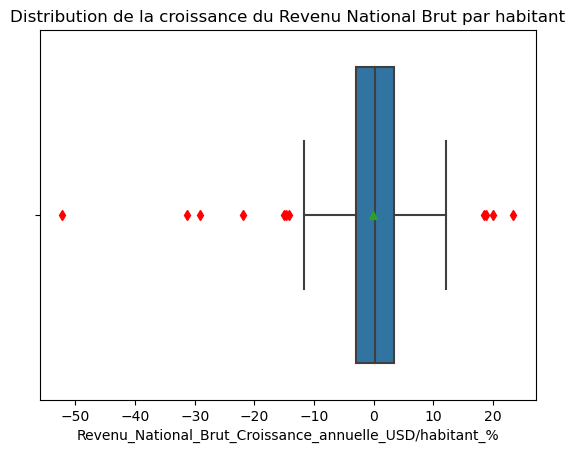

In [42]:
# Boxplot Stabilité politique
sns.boxplot(data=data, x="Revenu_National_Brut_Croissance_annuelle_USD/habitant_%", showmeans=True, flierprops={"markerfacecolor": "red", "markeredgecolor": "red"})
plt.title("Distribution de la croissance du Revenu National Brut par habitant")
# Stabilité politique
data[["Zone","Stabilité politique","Revenu_National_Brut_Croissance_annuelle_USD/habitant_%","Food_price_inflation_%"]].sort_values("Revenu_National_Brut_Croissance_annuelle_USD/habitant_%").head()

Nous avons des valeurs qui parraissant suspectes aux colonnes :
- Revenu_National_Brut_Croissance_annuelle_USD/habitant_%
    - https://data.worldbank.org/indicator/NY.GNP.PCAP.KD.ZG?end=2021&start=2005
- Food price inflation relative au Venezuela
    - https://data.worldbank.org/indicator/FP.CPI.TOTL.ZG?end=2022&locations=VE&start=2006

In [43]:
# Remplacer par la médiane le Venezuela
mediane_FPI = data["Food_price_inflation_%"].median()
data.loc[data["Zone"] == "Venezuela (République bolivarienne du)", "Food_price_inflation_%"] = mediane_FPI

In [44]:
data.isnull().sum()

Zone                                                        0
Accès eau potable                                           0
PIB par habitant                                            0
Prévalence_excès_pondéral_enfant_moins_de_5_ans             0
Stabilité politique                                         0
Utilisation services eau de base (%)                        0
Valeur importations alimentaires / exportations (%)         0
Disponibilite_interieure_x1000T                             0
Disponibilité alimentaire (Kcal/personne/jour)              0
Disponibilité alimentaire en quantité (kg/personne/an)      0
Disponibilité de protéines en quantité (g/personne/jour)    0
Exportations_Qte_x1000                                      0
Importations_Qte_x1000T                                     0
Nourriture_x1000T                                           0
Production_x1000T                                           0
Revenu_National_Brut_Croissance_annuelle_USD/habitant_%     0
Revenu_N

In [45]:
data = data.set_index("Zone")

## Python Outlier Detection / PyOD

- KNN : Proximity-Based, k Nearest Neighbors (use the distance to the kth nearest neighbor as the outlier score)
    - https://github.com/yzhao062/pyod#id27

In [46]:
# Import the necessary libraries
from pyod.models.knn import KNN
from pyod.models.iforest import IForest
from pyod.utils.data import evaluate_print

# Initialize a kNN detector
clf = KNN(contamination=0.02)
# clf = IForest(contamination=0.03)

# Fit the model to your data
clf.fit(data)

# Obtain the outlier scores and outlier predictions for your data
outlier_scores = clf.decision_scores_
outlier_predictions = clf.predict(data)

# Print the outlier scores and predictions
print("Outlier Scores:")
print(outlier_scores)
print("\nOutlier Predictions:")
print(outlier_predictions)

# Optionally, you can print the indices of the identified outliers
outlier_indices = [index for index, prediction in enumerate(outlier_predictions) if prediction == 1]
print("\nIndices of Identified Outliers:")
print(outlier_indices)

Outlier Scores:
[  24806.92131077    8962.45580492   13563.96992506    4278.14875941
   16871.85933452   43418.64638235    6640.13494442    9270.65358673
   30198.66561783   23873.72091385    3548.46794737   32828.49101911
   25681.64853809    7249.6840259    16095.01609602   16358.29788946
   52316.90037826   11749.54870932   24797.53160324    5882.86193809
    5875.43040365    6110.02834543    4303.0142065     5662.87085477
   66551.59011713    8909.3363798     4509.17292961    4147.47729276
    8038.67117248    3996.20563297    5882.86193809    5846.1781032
    4701.09181941   47484.25124909   13955.72419695   29445.62351085
   66435.31479859   14229.87731134 1218320.46428735   10717.21181984
   13321.60380792    6115.37872119    3795.82572147    8182.3892587
    9305.74414238    7935.75163334    5842.21132131   29770.97236524
   14645.52687173    4705.13087934    4940.96415      26646.06645164
   11353.57597243    7070.7127794     9277.84019276   24511.48347868
   39202.75364947   

In [47]:
outlier_rows = data.iloc[outlier_indices]
outlier_rows

,Accès eau potable,PIB par habitant,Prévalence_excès_pondéral_enfant_moins_de_5_ans,Stabilité politique,Utilisation services eau de base (%),Valeur importations alimentaires / exportations (%),Disponibilite_interieure_x1000T,Disponibilité alimentaire (Kcal/personne/jour),Disponibilité alimentaire en quantité (kg/personne/an),Disponibilité de protéines en quantité (g/personne/jour),Exportations_Qte_x1000,Importations_Qte_x1000T,Nourriture_x1000T,Production_x1000T,Revenu_National_Brut_Croissance_annuelle_USD/habitant_%,Revenu_National_Brut_Valeur_USD/habitant,Agriculture_Expenditure_Share,Agriculture_Value_Added_Share_of_GDP,Prevalence_of_Undernourishment,Food_price_inflation_%,Agriculture_Value_Added_per_worker,Mean_weekly_hours_worked_per_employee_in_agriculture,Population_x1000,Distance_France_kms
Zone,,,,,,,,,,,,,,,,,,,,,,,,
"Chine, continentale",93.81,10170.0,5.8,-0.26,93.81,5.0,20911.0,69.43,14.84,4.78,588.0,795.0,21282.0,20761.0,2.588303,10014.993550,9.57,7.46,2.5,7.284039,5856.54,38.700000,1427647.786,8239.0
Inde,90.03,6436.2,2.4,-0.99,89.60,6.0,4382.0,10.87,3.21,1.08,6.0,0.0,4382.0,4387.0,2.227610,2041.273704,7.50,16.73,14.4,3.574026,2181.60,53.740000,1352642.280,6599.0
Indonésie,91.65,11397.4,11.9,-0.55,90.90,8.0,3966.0,49.62,14.65,4.92,0.0,0.0,3966.0,3975.0,6.303215,4025.028055,4.94,12.71,6.0,1.084955,3560.43,34.810000,267670.543,11587.0
États-Unis d'Amérique,97.00,61355.6,8.2,0.42,99.00,8.0,19225.0,230.17,58.38,20.84,3725.0,123.0,19212.0,22878.0,3.273029,65100.976365,0.52,0.75,2.5,0.885506,65829.70,39.173333,327096.265,6180.0


- Argentine : 
    - https://www.statista.com/statistics/1083414/argentina-agriculture-value-added-worker-gdp/
    - https://data.worldbank.org/indicator/NY.GNP.PCAP.KD.ZG?locations=AR
- Japon : https://www.statista.com/statistics/270093/distribution-of-gross-domestic-product-gdp-across-economic-sectors-in-japan/#:~:text=In%202020%2C%20agriculture%20contributed%20around,further%20information%2C%20see%20Japan's%20GDP

In [48]:
data.loc[data.index =="Argentine","Agriculture_Value_Added_per_worker"] = 2758
data.loc[data.index =="Argentine","Revenu_National_Brut_Croissance_annuelle_USD/habitant_%"] = -3.3

## Suppression des outliers

In [49]:
# Suppression des Outliers
data.drop(["Chine, continentale", "Inde", "États-Unis d'Amérique"], axis=0, inplace=True)

## Correlation Heatmap

Text(0.5, 1.0, 'Heatmap\n')

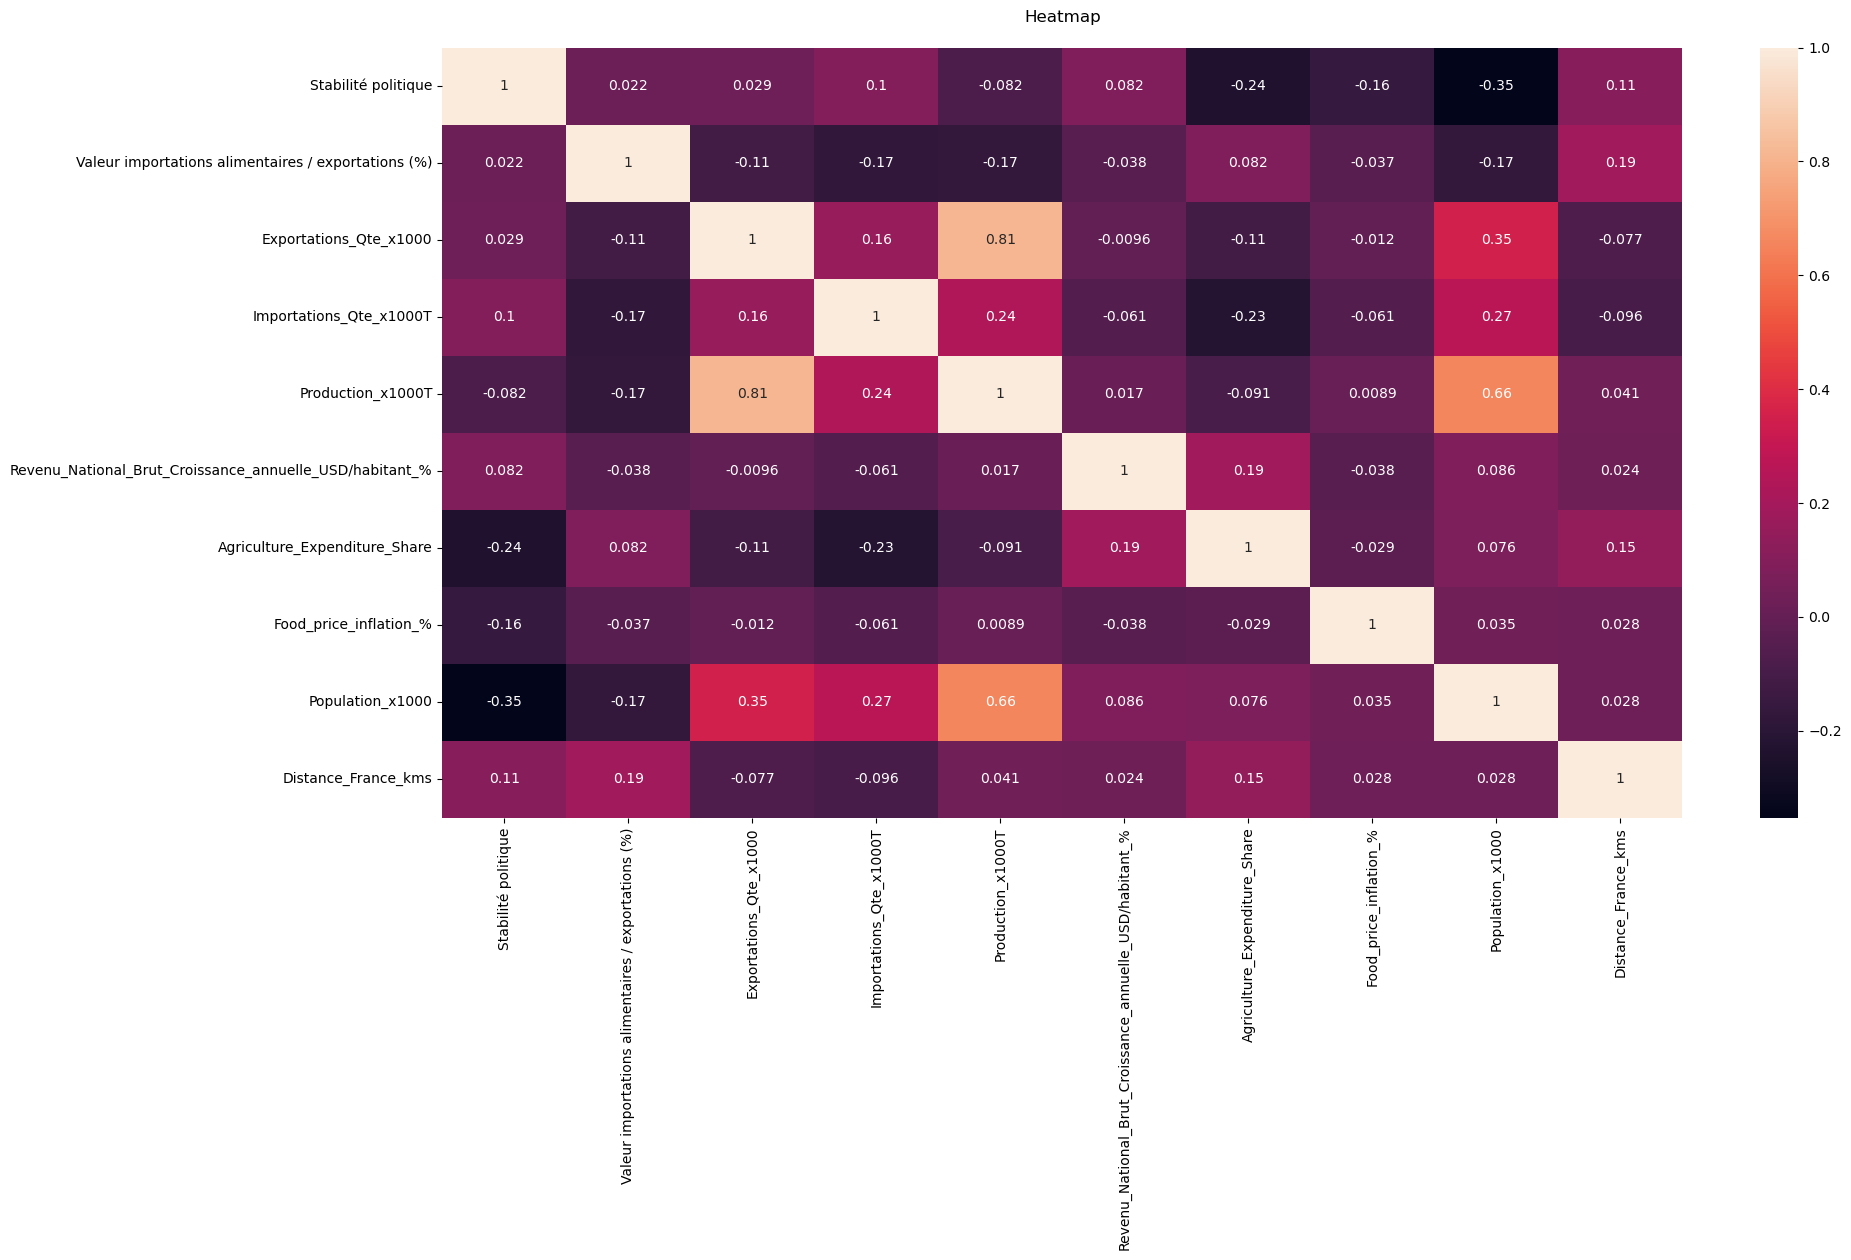

In [50]:
Colonnes_pertinentes = [
"Stabilité politique",
"Valeur importations alimentaires / exportations (%)",
"Exportations_Qte_x1000",
"Importations_Qte_x1000T",
"Production_x1000T",
"Revenu_National_Brut_Croissance_annuelle_USD/habitant_%",
"Agriculture_Expenditure_Share",
"Food_price_inflation_%",
"Population_x1000",
"Distance_France_kms"
]

data_variable_ok = data[Colonnes_pertinentes]
plt.figure(figsize=(20,10))
sns.heatmap(data_variable_ok.corr(), fmt='.2g', annot=True)
plt.title("Heatmap\n")

- Les exportations sont corrélées à la production
- La production est corrélées aux exportations et à la population

# Export du fichier final en CSV

In [51]:
# Export csv du fichier final
data.to_csv("data_2019_VF", index=True)